In [ ]:
""" Plot quarterly U.S. GDP growth """
import pandas as pd
import numpy as np
import os
import sys
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

##### Set the current working directory
path="e:\\Copy\\SCRIPTS\\Forecast Covid Recovery\\Data\\FRED\\"
os.chdir(path)

##### parse dates and times
def date_parser(date): 
    dt = datetime.datetime.strptime(date, '%m/%d/%Y')
    return dt.strftime('%Y-%m-%d') 

##### parse dates and times
def date_parser2(date): 
    dt = datetime.datetime.strptime(date, '%Y:%m:%d')
    return dt.strftime('%Y-%m-%d') 

##### import data and NBER recession dates
US_df_big = pd.read_csv('./quarterly_transformed_pca.csv', engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',')
US_df_big.date = pd.to_datetime(US_df_big.date, format='%m/%d/%Y')
US_df_small = pd.read_csv('./quarterly_transformed_pdc_sis.csv', engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',')
US_df_small.date = pd.to_datetime(US_df_big.date, format='%m/%d/%Y')
# import ADS Index
fields_ADS = ['date', 'ADS_Index']
US_ADS_df = pd.read_csv('../ADS_Index_Most_Current_Vintage.csv', engine = 'python', encoding='utf-8', skipinitialspace=True, usecols = fields_ADS, sep = ',')
US_ADS_df.date = pd.to_datetime( US_ADS_df.date.astype(str).apply(date_parser2) )# parse dates
US_ADS_df.dropna(inplace=True)
US_ADS_df.set_index('date', inplace=True)
US_ADS_df_monthly = US_ADS_df.copy().resample('M').mean().reset_index() # convert a time series to the monthly frequencey by sampling then taking mean
# import NBER recession dates
recession_dates = pd.read_csv('./NBER_recession_dates.csv', engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates=['Peak', 'Trough'])

##### plot strong predictors of the GDP growth selected by a variable screening procedure
fig, ax = plt.subplots( figsize=(13, 10) )
colors = ['k', 'darkorange', 'b', 'c', 'm', 'blueviolet', 'crimson', 'limegreen', 'chocolate', 'slategray']
markers = ['o', 'v', '^', 'p', '>', '*', 'x', 'h', '<', 'd'] 
# lines = ["-", "dotted", "dotted", "dotted", "dotted", "dotted", "dotted", "dotted", "dotted", "dotted"]
lines = ["-", "-", "-", "-", "-", "-", "-", "-", "-", "-"]
linewidths = [3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = US_df_small.columns
zorders = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
for i in range(US_df_small.shape[1]-1):
    ax.plot(US_df_small.date, US_df_small.iloc[:, i+1], color=colors[i], linestyle=lines[i], linewidth=linewidths[i], label=labels[i+1], zorder=zorders[i])
ax.plot(US_ADS_df_monthly.date, US_ADS_df_monthly.ADS_Index/100, color='magenta', linestyle='-', linewidth=2.5, label='ADS Index', zorder=1.5)

for row in recession_dates.iterrows():
    x = row[1]
    y1, y2 = -0.20, 0.20
    ax.fill_between(x, y1=y1, y2=y2, alpha=.5, color='y')

# set minor ticks every quarter
ax.xaxis.set_minor_locator( mdates.MonthLocator(interval=3) )

# set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d') )
plt.grid(ls=':')
plt.xlabel('Date', fontsize=15)
plt.ylabel(' ', fontsize=15)
plt.xticks(rotation = 10)
plt.legend(fontsize=10, loc='lower right')
fig.savefig('./strong_predictors.pdf', dpi=500)
print(ax)


# ##### plot U.S. GDP growth rate
# fig, ax = plt.subplots( figsize=(10, 8) )
# ax.plot(US_df_big.date, US_df_big.GDP)
# for row in recession_dates.iterrows():
#     x = row[1]
#     y1, y2 = -0.15, 0.15
#     ax.fill_between(x, y1=y1, y2=y2, alpha=.5, color='y')

# # set minor ticks every quarter
# ax.xaxis.set_minor_locator( mdates.MonthLocator(interval=3) )

# # set major ticks format
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d') )
# plt.grid(ls=':')
# plt.xlabel('Date', fontsize=15)
# plt.ylabel('U.S. GDP growth', fontsize=15)
# plt.xticks(rotation = 10)
# fig.savefig('./GDP_plot.pdf', dpi=500)
# print(ax)

# ##### plot autocorrelations of U.S. GDP growth
# fig, ax = plt.subplots( figsize=(10, 8) )
# ax = plt.acorr(US_df_big.GDP)
# plt.axhline(0, ls = '--', linewidth = 2, color ='red') 
# plt.grid(ls=':')
# plt.xlabel('Lags', fontsize=15)
# plt.ylabel('Autocorrelation', fontsize=15)
# fig.savefig('./autocorr.pdf', dpi=500)
# print(ax)


         date      LSTM     Ridge     Lasso  XGBoost  GBM (Sklearn)  \
0  1984-06-01  0.011902  0.012814  0.012967   0.0111       0.013594   
1  1984-09-01  0.012263  0.012810  0.012973   0.0111       0.014919   
2  1984-12-01  0.011531  0.012822  0.012925   0.0113       0.014768   
3  1985-03-01  0.011697  0.012709  0.012762   0.0113       0.014076   
4  1985-06-01  0.011792  0.012707  0.012762   0.0109       0.011389   

   GBM (H2O)  Random Forest (Sklearn)  Random Forest (H2O)  Deep NN (Sklearn)  \
0     0.0116                 0.011680               0.0115           0.011940   
1     0.0116                 0.011736               0.0115           0.012243   
2     0.0115                 0.011918               0.0113           0.011981   
3     0.0114                 0.011649               0.0112           0.012035   
4     0.0113                 0.011541               0.0112           0.011807   

   Deep NN (H2O)  
0         0.0140  
1         0.0145  
2         0.0142  
3         

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AxesSubplot(0.125,0.125;0.775x0.755)
         date      LSTM     Ridge     Lasso  XGBoost  GBM (Sklearn)  \
0  1984-06-01  0.009297  0.009644  0.010485   0.0089       0.010907   
1  1984-09-01  0.009850  0.009594  0.010517   0.0090       0.011525   
2  1984-12-01  0.009485  0.009625  0.010365   0.0092       0.011002   
3  1985-03-01  0.009234  0.009431  0.010062   0.0091       0.010613   
4  1985-06-01  0.009282  0.009413  0.010072   0.0087       0.008861   

   GBM (H2O)  Random Forest (Sklearn)  Random Forest (H2O)  Deep NN (Sklearn)  \
0     0.0095                 0.009557               0.0090           0.009438   
1     0.0094                 0.009553               0.0090           0.009794   
2     0.0093                 0.009458               0.0089           0.009516   
3     0.0091                 0.009065               0.0088           0.009606   
4     0.0088                 0.008996               0.0086           0.009090   

   Deep NN (H2O)  
0         0.0108  
1         0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AxesSubplot(0.125,0.125;0.775x0.755)
         date      LSTM     Ridge     Lasso  XGBoost  GBM (Sklearn)  \
0  1984-06-01  0.058229 -0.091580 -0.117802   0.1987      -0.228593   
1  1984-09-01 -0.001304 -0.092534 -0.120563   0.1944      -0.481935   
2  1984-12-01  0.085389 -0.130937 -0.149231   0.1447      -0.500253   
3  1985-03-01  0.059553 -0.110181 -0.119405   0.1494      -0.361832   
4  1985-06-01  0.042245 -0.112057 -0.121841   0.1994       0.106633   

   GBM (H2O)  Random Forest (Sklearn)  Random Forest (H2O)  Deep NN (Sklearn)  \
0     0.1222                 0.093089               0.1504           0.052236   
1     0.1219                 0.082934               0.1488           0.002026   
2     0.1080                 0.022964               0.1484           0.012572   
3     0.1261                 0.067319               0.1538           0.004397   
4     0.1399                 0.082587               0.1609           0.039903   

   Deep NN (H2O)  
0        -0.2613  
1        -0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AxesSubplot(0.125,0.125;0.775x0.755)


True

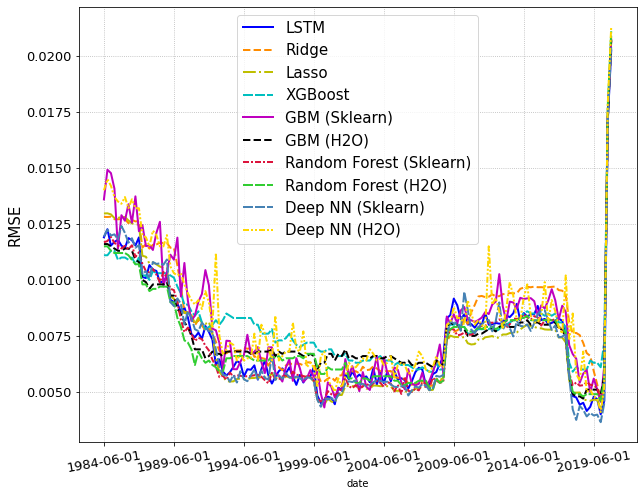

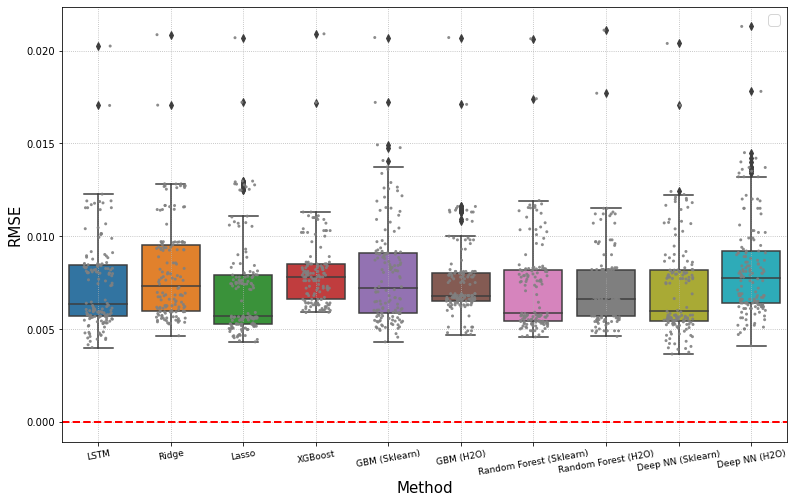

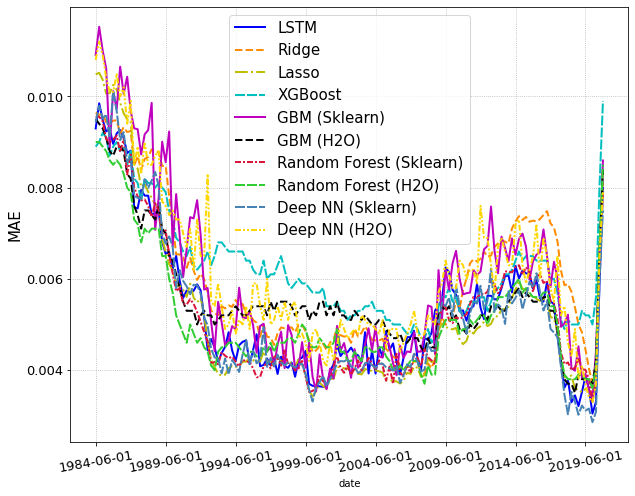

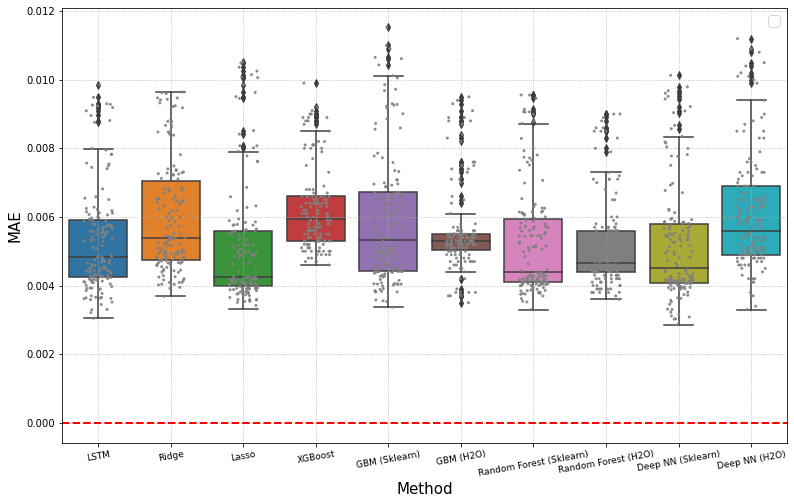

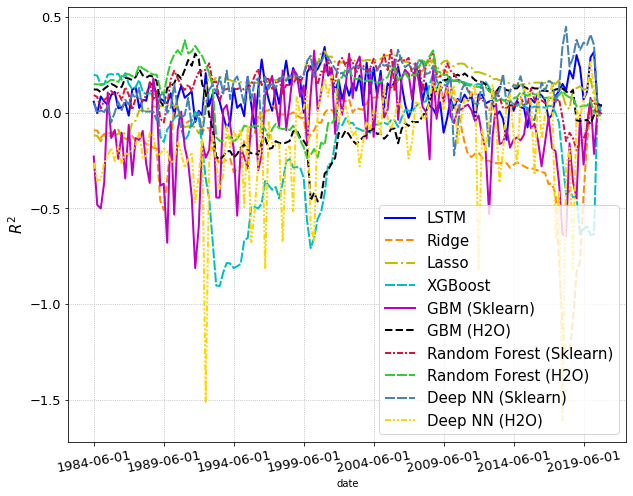

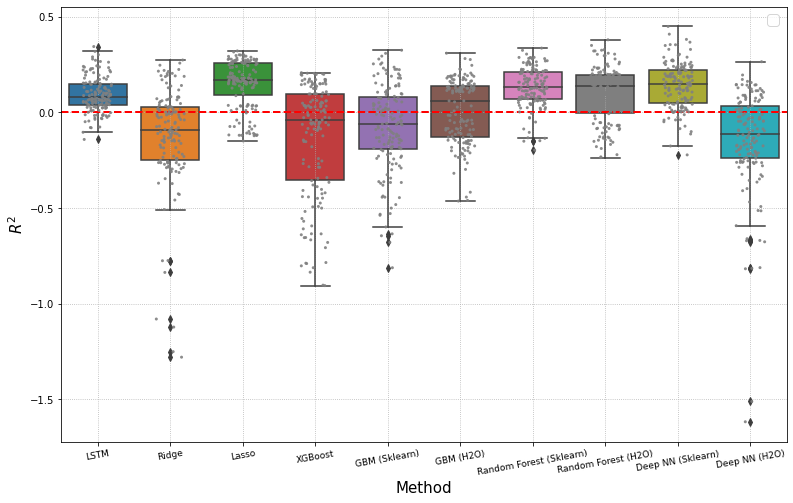

In [16]:
# ================================================ Plot out-of-sample statistics for big FRED-QD ========================================================= #
# =========================================================================================================================================== #
import pandas as pd
import numpy as np
import os
import sys
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

##### Set the current working directory
path="e:\\Copy\\SCRIPTS\\Forecast_Covid_Recovery\\Data\\FRED\\Revision_1\\"
os.chdir(path)

##### parse dates and times
def date_parser(date): 
    dt = datetime.datetime.strptime(date, '%m/%d/%Y')
    return dt.strftime('%Y-%m-%d') 

def plot_OoS_stats(fhorizon=1):
    ##### Import data
    lstm_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big1_model_LSTMf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ridge_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big1_model_ridge_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    lasso_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big1_model_lasso_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    pca_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big1_model_multivar_lhOLSPC_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    xgboost_h2o_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big_model_xgboost_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    gbm_sklearn_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big1_model_GBMf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    gbm_h2o_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big_model_gbm_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
                    
    RF_sklearn_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big1_model_RFf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    RF_h2o_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big_model_randomforest_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    DL_sklearn_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big1_model_ANNf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    DL_h2o_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big_model_deeplearning_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
                        

    ##### Plot RMSE
    rmse_df = pd.DataFrame(zip(lstm_df.index, lstm_df.rmse, ridge_df.rmse, lasso_df.rmse, xgboost_h2o_df.rmse, gbm_sklearn_df.rmse, gbm_h2o_df.rmse, \
								RF_sklearn_df.rmse, RF_h2o_df.rmse, DL_sklearn_df.rmse, DL_h2o_df.rmse), \
                                columns = ['date', 'LSTM', 'Ridge', 'Lasso',  'XGBoost', 'GBM (Sklearn)', 'GBM (H2O)', 'Random Forest (Sklearn)', \
											'Random Forest (H2O)', 'Deep NN (Sklearn)', 'Deep NN (H2O)']) # there are 12 numerical columns
    rmse_df['date'] = rmse_df.date.astype(str) # convert dates to string objects
    print(rmse_df.head())

    colors = ['b', 'darkorange', 'y', 'c', 'm', 'k', 'crimson', 'limegreen', 'steelblue', 'gold', 'hotpink', 'maroon']
    markers = ['o', 'v', '^', 'p', '>', '*', 'x', 'h', '+', 'p', "D", "d"] 
    lines = ["-", "--", "-.", (0, (5, 1) ), "-", "--", (0, (3, 1, 1, 1) ), (0, (5, 1) ), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 10, 1, 10, 1, 10)), "-"]
    linewidths = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
    ax = rmse_df.set_index('date').plot(kind='line', figsize=(10, 8), rot=10, color=colors)

    # set line width and line style
    for i, line in enumerate(ax.get_lines()):
        line.set_linewidth(linewidths[i])
        line.set_linestyle(lines[i])
    #     line.set_marker(markers[i])
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    ax.set_ylabel('RMSE', fontsize=15)

    plt.savefig(f'./US_df_big/graphs/rmse_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(data=rmse_df)
    ax = sns.stripplot(data=rmse_df, jitter=0.2, dodge=True, color='gray', size=3, alpha=0.9)
    ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.set_ylabel('RMSE', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    fig.savefig(f'./US_df_big/graphs/rmse_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)


    ##### Plot MAE
    mae_df = pd.DataFrame(zip(lstm_df.index, lstm_df.mae, ridge_df.mae, lasso_df.mae, xgboost_h2o_df.mae, gbm_sklearn_df.mae, gbm_h2o_df.mae, \
								RF_sklearn_df.mae, RF_h2o_df.mae, DL_sklearn_df.mae, DL_h2o_df.mae), \
                                columns = ['date', 'LSTM', 'Ridge', 'Lasso', 'XGBoost', 'GBM (Sklearn)', 'GBM (H2O)', 'Random Forest (Sklearn)', \
											'Random Forest (H2O)', 'Deep NN (Sklearn)', 'Deep NN (H2O)']) # there are 12 numerical columns
    mae_df['date'] = mae_df.date.astype(str) # convert dates to string objects
    print(mae_df.head())

    ax = mae_df.set_index('date').plot(kind='line', figsize=(10, 8), rot=10, color=colors)
    # set line width and line style
    for i, line in enumerate(ax.get_lines()):
        line.set_linewidth(linewidths[i])
        line.set_linestyle(lines[i])
    #     line.set_marker(markers[i])
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    ax.set_ylabel('MAE', fontsize=15)

    plt.savefig(f'./US_df_big/graphs/mae_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(data=mae_df)
    ax = sns.stripplot(data=mae_df, jitter=0.2, dodge=True, color='gray', size=3, alpha=0.9)
    ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.set_ylabel('MAE', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    fig.savefig(f'./US_df_big/graphs/mae_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    ##### Plot R_sq
    r_sq_df = pd.DataFrame(zip(lstm_df.index, lstm_df.r_sq, ridge_df.r_sq, lasso_df.r_sq, xgboost_h2o_df.r_sq, gbm_sklearn_df.r_sq, gbm_h2o_df.r_sq, \
								RF_sklearn_df.r_sq, RF_h2o_df.r_sq, DL_sklearn_df.r_sq, DL_h2o_df.r_sq), \
                                columns = ['date', 'LSTM', 'Ridge', 'Lasso', 'XGBoost', 'GBM (Sklearn)', 'GBM (H2O)', 'Random Forest (Sklearn)', \
											                                                                                    'Random Forest (H2O)', 'Deep NN (Sklearn)', 'Deep NN (H2O)']) # there are 12 numerical columns
    r_sq_df['date'] = r_sq_df.date.astype(str) # convert dates to string objects
    print(r_sq_df.head())

    ax = r_sq_df.set_index('date').plot(kind='line', figsize=(10, 8), rot=10, color=colors)
    # set line width and line style
    for i, line in enumerate(ax.get_lines()):
        line.set_linewidth(linewidths[i])
        line.set_linestyle(lines[i])
    #     line.set_marker(markers[i])
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    ax.set_ylabel('$R^2$', fontsize=15)

    plt.savefig(f'./US_df_big/graphs/r_sq_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(data=r_sq_df)
    ax = sns.stripplot(data=r_sq_df, jitter=0.2, dodge=True, color='gray', size=3, alpha=0.9)
    ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.set_ylabel('$R^2$', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    fig.savefig(f'./US_df_big/graphs/r_sq_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)
    return True

plot_OoS_stats(4)


         date      LSTM     Ridge     Lasso      sPCA  XGBoost  GBM (Sklearn)  \
0  1984-03-01  0.012433  0.012374  0.011945  0.011775   0.0145       0.014288   
1  1984-06-01  0.011866  0.012426  0.012011  0.011850   0.0142       0.012634   
2  1984-09-01  0.012005  0.012436  0.012003  0.011844   0.0142       0.012223   
3  1984-12-01  0.011626  0.012434  0.011816  0.011654   0.0142       0.014326   
4  1985-03-01  0.011664  0.012225  0.011817  0.011655   0.0141       0.014186   

   GBM (H2O)  Random Forest (Sklearn)  Random Forest (H2O)  Deep NN (Sklearn)  \
0     0.0127                 0.014162               0.0135           0.011722   
1     0.0127                 0.013662               0.0131           0.011833   
2     0.0127                 0.013986               0.0131           0.011812   
3     0.0126                 0.013779               0.0132           0.011576   
4     0.0124                 0.013717               0.0131           0.011616   

   Deep NN (H2O)   Prophet

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AxesSubplot(0.125,0.125;0.775x0.755)
         date      LSTM     Ridge     Lasso      sPCA  XGBoost  GBM (Sklearn)  \
0  1984-03-01  0.009819  0.010120  0.009621  0.009439   0.0115       0.011762   
1  1984-06-01  0.009459  0.010186  0.009706  0.009537   0.0111       0.010425   
2  1984-09-01  0.009575  0.010231  0.009681  0.009516   0.0112       0.010136   
3  1984-12-01  0.009140  0.010222  0.009363  0.009202   0.0113       0.011347   
4  1985-03-01  0.009420  0.009928  0.009369  0.009207   0.0111       0.011054   

   GBM (H2O)  Random Forest (Sklearn)  Random Forest (H2O)  Deep NN (Sklearn)  \
0     0.0104                 0.011737               0.0110           0.009403   
1     0.0102                 0.010931               0.0107           0.009522   
2     0.0103                 0.011112               0.0105           0.009491   
3     0.0101                 0.010825               0.0107           0.009124   
4     0.0099                 0.010797               0.0106           0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
         date      LSTM     Ridge     Lasso      sPCA  XGBoost  GBM (Sklearn)  \
0  1984-03-01 -0.037632 -0.027750  0.042300  0.069363  -0.3687      -0.370342   
1  1984-06-01  0.063984 -0.026448  0.040988  0.066469  -0.2995      -0.061168   
2  1984-09-01  0.040438 -0.029760  0.040659  0.065946  -0.3028       0.005241   
3  1984-12-01  0.070134 -0.063590  0.039620  0.065723  -0.3487      -0.411843   
4  1985-03-01  0.064855 -0.027167  0.040230  0.066310  -0.3355      -0.383163   

   GBM (H2O)  Random Forest (Sklearn)  Random Forest (H2O)  Deep NN (Sklearn)  \
0    -0.0600                -0.346246              -0.1865           0.077625   
1    -0.0380                -0.240773              -0.1194           0.069101   
2    -0.0398                -0.302451              -0.1073           0.071041   
3    -0.0608                -0.306088              -0.1645           0.078266   
4    -0.0363                -0.293

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AxesSubplot(0.125,0.125;0.775x0.755)


True

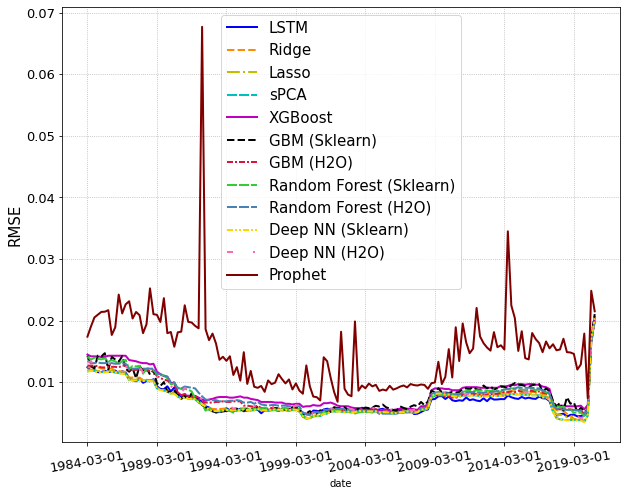

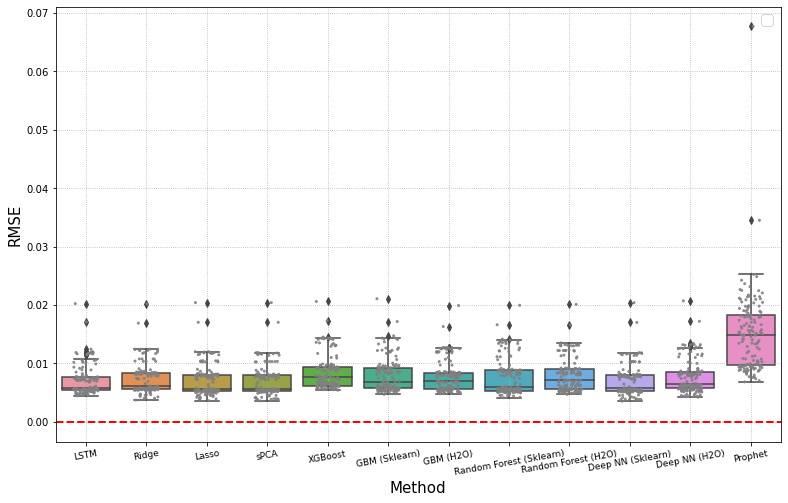

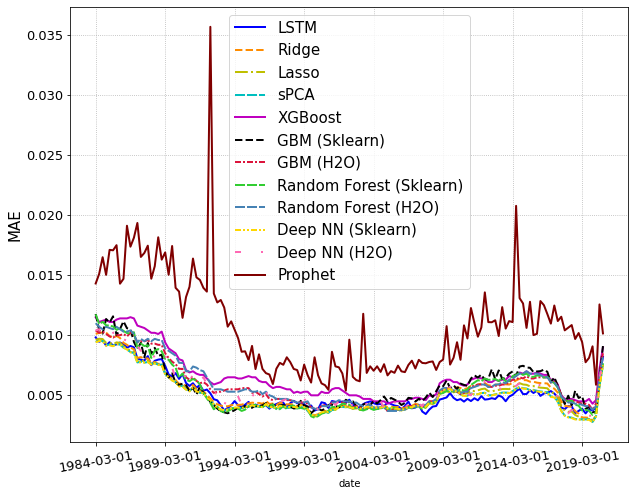

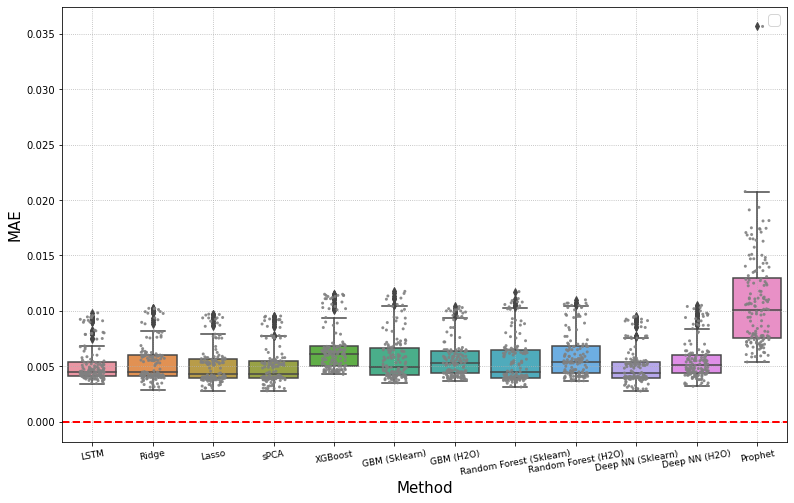

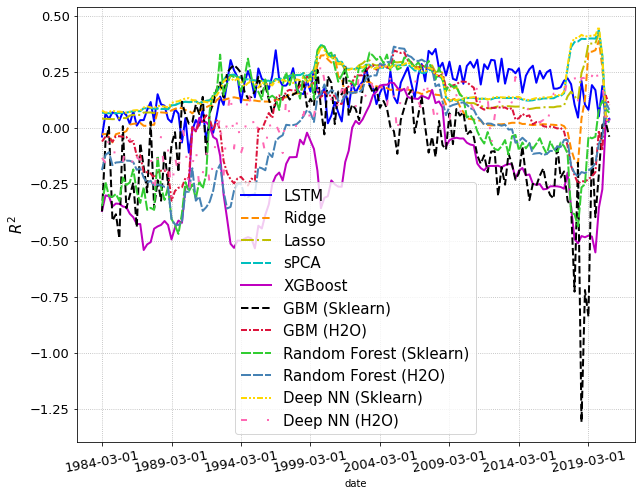

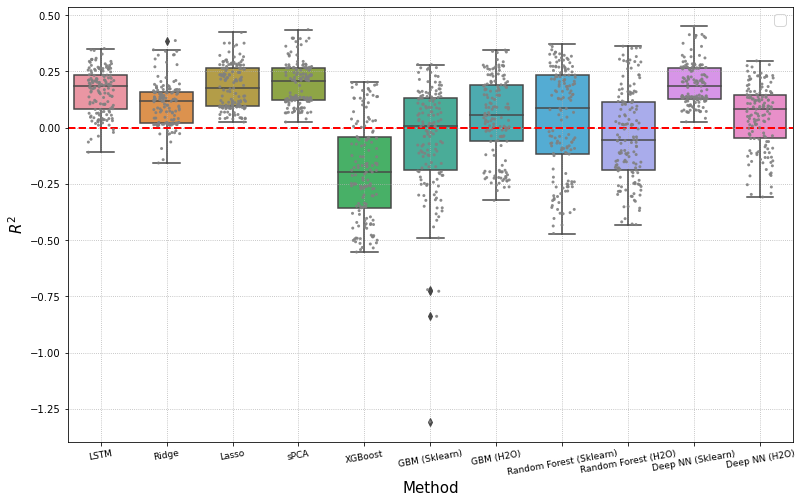

In [20]:
# ======================================== Plot out-of-sample statistics for small FRED-QD ============================================================== #
# ========================================================================================================================================== #
import pandas as pd
import numpy as np
import os
import sys
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

##### Set the current working directory
path="e:\\Copy\\SCRIPTS\\Forecast_Covid_Recovery\\Data\\FRED\\Revision_1\\"
os.chdir(path)

##### parse dates and times
def date_parser(date): 
    dt = datetime.datetime.strptime(date, '%m/%d/%Y')
    return dt.strftime('%Y-%m-%d') 

def plot_OoS_stats(fhorizon=1):
    ##### Import data
    lstm_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_LSTMf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ridge_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_ridge_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    lasso_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_lasso_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    pca_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_multivar_lhOLSPC_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    xgboost_h2o_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_xgboost_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    gbm_sklearn_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_GBMf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    gbm_h2o_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_gbm_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
                    
    RF_sklearn_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_RFf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    RF_h2o_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_randomforest_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    DL_sklearn_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_ANNf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    DL_h2o_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_deeplearning_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
                        
    prophet_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_prophetf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')


    ##### Plot RMSE
    rmse_df = pd.DataFrame(zip(lstm_df.index, lstm_df.rmse, ridge_df.rmse, lasso_df.rmse, pca_df.rmse, xgboost_h2o_df.rmse, gbm_sklearn_df.rmse, gbm_h2o_df.rmse, \
								RF_sklearn_df.rmse, RF_h2o_df.rmse, DL_sklearn_df.rmse, DL_h2o_df.rmse, prophet_df.rmse), \
                                columns = ['date', 'LSTM', 'Ridge', 'Lasso', 'sPCA', 'XGBoost', 'GBM (Sklearn)', 'GBM (H2O)', 'Random Forest (Sklearn)', \
											'Random Forest (H2O)', 'Deep NN (Sklearn)', 'Deep NN (H2O)', 'Prophet']) # there are 12 numerical columns
    rmse_df['date'] = rmse_df.date.astype(str) # convert dates to string objects
    print(rmse_df.head())

    colors = ['b', 'darkorange', 'y', 'c', 'm', 'k', 'crimson', 'limegreen', 'steelblue', 'gold', 'hotpink', 'maroon']
    markers = ['o', 'v', '^', 'p', '>', '*', 'x', 'h', '+', 'p', "D", "d"] 
    lines = ["-", "--", "-.", (0, (5, 1) ), "-", "--", (0, (3, 1, 1, 1) ), (0, (5, 1) ), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 10, 1, 10, 1, 10)), "-"]
    linewidths = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
    ax = rmse_df.set_index('date').plot(kind='line', figsize=(10, 8), rot=10, color=colors)

    # set line width and line style
    for i, line in enumerate(ax.get_lines()):
        line.set_linewidth(linewidths[i])
        line.set_linestyle(lines[i])
    #     line.set_marker(markers[i])
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    ax.set_ylabel('RMSE', fontsize=15)

    plt.savefig(f'./US_df_small/graphs/rmse_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(data=rmse_df)
    ax = sns.stripplot(data=rmse_df, jitter=0.2, dodge=True, color='gray', size=3, alpha=0.9)
    ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.set_ylabel('RMSE', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    fig.savefig(f'./US_df_small/graphs/rmse_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)


    ##### Plot MAE
    mae_df = pd.DataFrame(zip(lstm_df.index, lstm_df.mae, ridge_df.mae, lasso_df.mae, pca_df.mae, xgboost_h2o_df.mae, gbm_sklearn_df.mae, gbm_h2o_df.mae, \
								RF_sklearn_df.mae, RF_h2o_df.mae, DL_sklearn_df.mae, DL_h2o_df.mae, prophet_df.mae), \
                                columns = ['date', 'LSTM', 'Ridge', 'Lasso', 'sPCA', 'XGBoost', 'GBM (Sklearn)', 'GBM (H2O)', 'Random Forest (Sklearn)', \
											'Random Forest (H2O)', 'Deep NN (Sklearn)', 'Deep NN (H2O)', 'Prophet']) # there are 12 numerical columns
    mae_df['date'] = mae_df.date.astype(str) # convert dates to string objects
    print(mae_df.head())

    ax = mae_df.set_index('date').plot(kind='line', figsize=(10, 8), rot=10, color=colors)
    # set line width and line style
    for i, line in enumerate(ax.get_lines()):
        line.set_linewidth(linewidths[i])
        line.set_linestyle(lines[i])
    #     line.set_marker(markers[i])
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    ax.set_ylabel('MAE', fontsize=15)

    plt.savefig(f'./US_df_small/graphs/mae_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(data=mae_df)
    ax = sns.stripplot(data=mae_df, jitter=0.2, dodge=True, color='gray', size=3, alpha=0.9)
    ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.set_ylabel('MAE', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    fig.savefig(f'./US_df_small/graphs/mae_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    ##### Plot R_sq
    r_sq_df = pd.DataFrame(zip(lstm_df.index, lstm_df.r_sq, ridge_df.r_sq, lasso_df.r_sq, pca_df.r_sq, xgboost_h2o_df.r_sq, gbm_sklearn_df.r_sq, gbm_h2o_df.r_sq, \
								RF_sklearn_df.r_sq, RF_h2o_df.r_sq, DL_sklearn_df.r_sq, DL_h2o_df.r_sq), \
                                columns = ['date', 'LSTM', 'Ridge', 'Lasso', 'sPCA', 'XGBoost', 'GBM (Sklearn)', 'GBM (H2O)', 'Random Forest (Sklearn)', \
											                                                                                    'Random Forest (H2O)', 'Deep NN (Sklearn)', 'Deep NN (H2O)']) # there are 12 numerical columns
    r_sq_df['date'] = r_sq_df.date.astype(str) # convert dates to string objects
    print(r_sq_df.head())

    ax = r_sq_df.set_index('date').plot(kind='line', figsize=(10, 8), rot=10, color=colors)
    # set line width and line style
    for i, line in enumerate(ax.get_lines()):
        line.set_linewidth(linewidths[i])
        line.set_linestyle(lines[i])
    #     line.set_marker(markers[i])
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    ax.set_ylabel('$R^2$', fontsize=15)

    plt.savefig(f'./US_df_small/graphs/r_sq_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(data=r_sq_df)
    ax = sns.stripplot(data=r_sq_df, jitter=0.2, dodge=True, color='gray', size=3, alpha=0.9)
    ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.set_ylabel('$R^2$', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    fig.savefig(f'./US_df_small/graphs/r_sq_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)
    return True

plot_OoS_stats(4)


         date      LSTM     Ridge     Lasso      sPCA  XGBoost  GBM (Sklearn)  \
0  1985-06-01  0.011541  0.012271  0.011790  0.011633   0.0121       0.014763   
1  1985-09-01  0.012010  0.012350  0.011881  0.011796   0.0122       0.013160   
2  1985-12-01  0.011652  0.012348  0.011881  0.011763   0.0122       0.015035   
3  1986-03-01  0.011702  0.012185  0.011712  0.011535   0.0122       0.014032   
4  1986-06-01  0.011494  0.012103  0.011633  0.011440   0.0123       0.013235   

   GBM (H2O)  Random Forest (Sklearn)  Random Forest (H2O)  Deep NN (Sklearn)  \
0     0.0124                 0.012826               0.0127           0.011557   
1     0.0124                 0.013200               0.0127           0.011649   
2     0.0124                 0.013253               0.0126           0.011608   
3     0.0124                 0.013323               0.0126           0.011545   
4     0.0125                 0.013099               0.0126           0.011482   

   Deep NN (H2O)   Prophet

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
         date      LSTM     Ridge     Lasso      sPCA  XGBoost  GBM (Sklearn)  \
0  1985-06-01  0.008899  0.009741  0.009261  0.009290   0.0091       0.010479   
1  1985-09-01  0.009738  0.009934  0.009470  0.009598   0.0092       0.010528   
2  1985-12-01  0.009121  0.009911  0.009475  0.009455   0.0093       0.011837   
3  1986-03-01  0.009141  0.009616  0.009196  0.009131   0.0094       0.010848   
4  1986-06-01  0.008858  0.009452  0.009043  0.008959   0.0095       0.010280   

   GBM (H2O)  Random Forest (Sklearn)  Random Forest (H2O)  Deep NN (Sklearn)  \
0     0.0099                 0.009680               0.0102           0.009043   
1     0.0099                 0.010145               0.0102           0.009210   
2     0.0101                 0.010184               0.0102           0.009166   
3     0.0101                 0.010184               0.0101           0.008985   
4     0.0101                 0.009

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AxesSubplot(0.125,0.125;0.775x0.755)
         date      LSTM     Ridge     Lasso      sPCA  XGBoost  GBM (Sklearn)  \
0  1985-06-01  0.082573 -0.037052  0.042612  0.067972   0.0145      -0.501158   
1  1985-09-01  0.017411 -0.038877  0.038499  0.052117   0.0174      -0.179755   
2  1985-12-01  0.074519 -0.039366  0.037801  0.056894   0.0158      -0.540940   
3  1986-03-01  0.051198 -0.028723  0.049686  0.078150  -0.0124      -0.364235   
4  1986-06-01  0.074538 -0.026225  0.051875  0.083106  -0.0334      -0.227164   

   GBM (H2O)  Random Forest (Sklearn)  Random Forest (H2O)  Deep NN (Sklearn)  \
0    -0.0267                -0.132950              -0.0755           0.080092   
1    -0.0172                -0.186792              -0.0646           0.075667   
2    -0.0217                -0.197264              -0.0624           0.081468   
3    -0.0409                -0.229754              -0.0741           0.076554   
4    -0.0607                -0.202002              -0.0890           0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


True

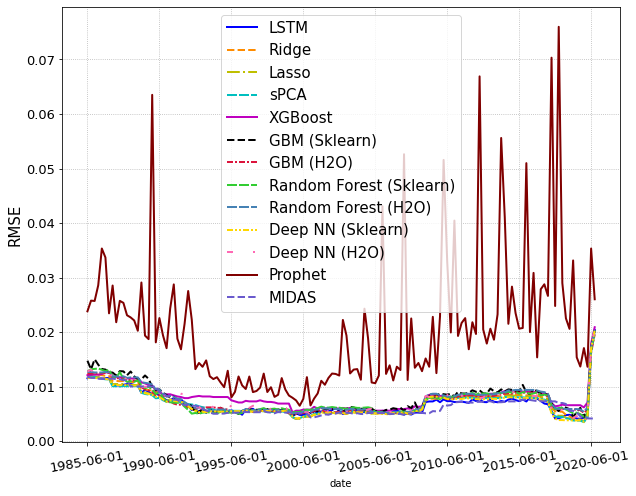

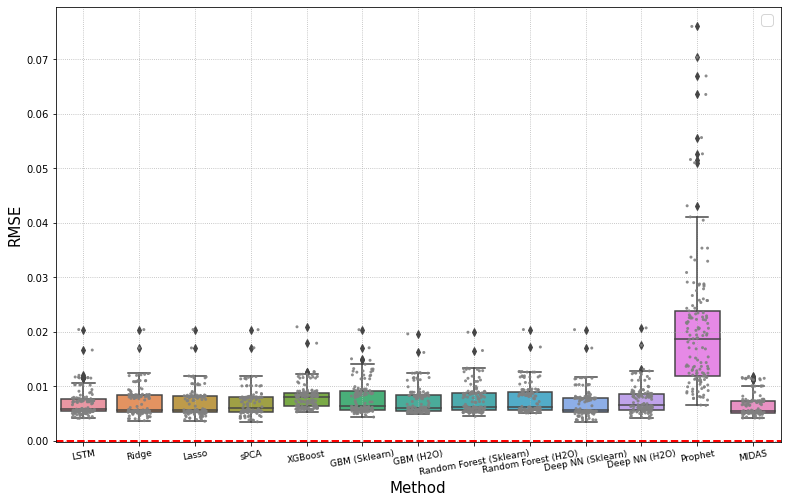

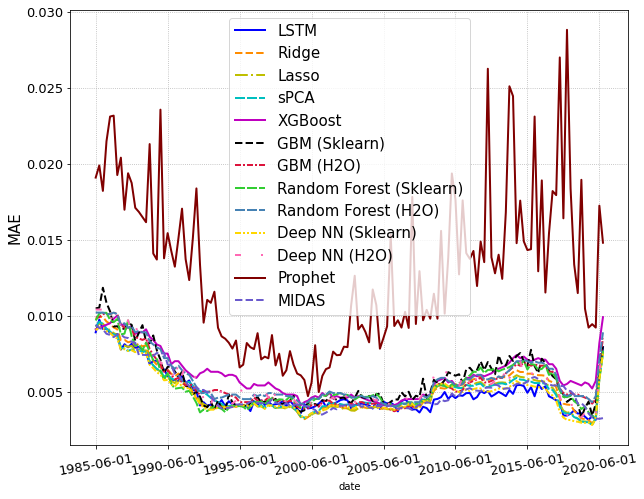

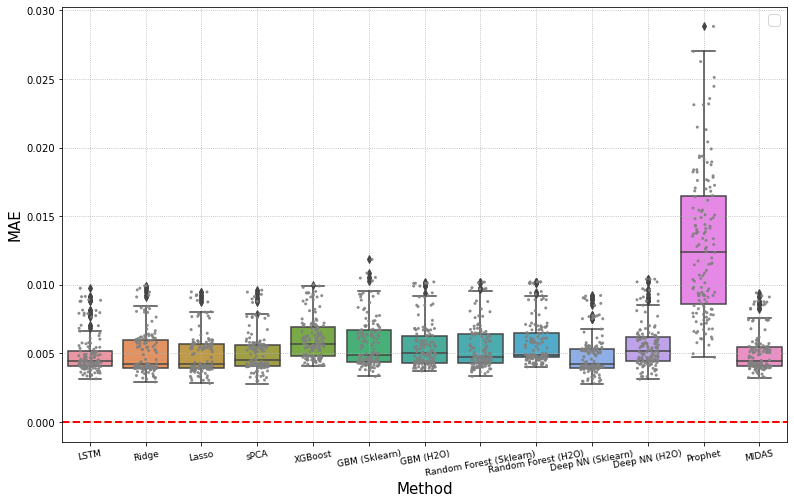

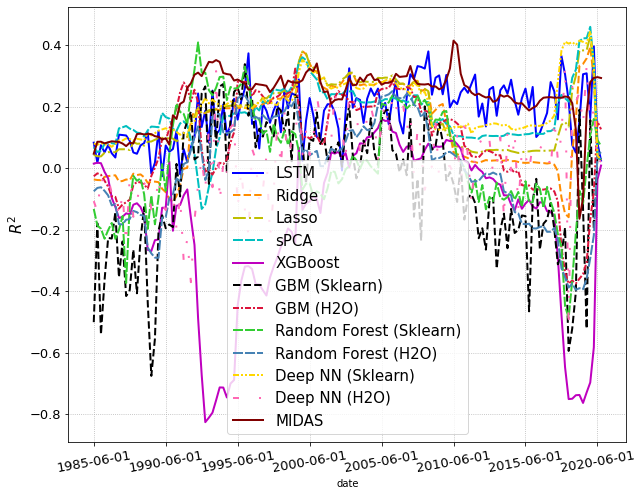

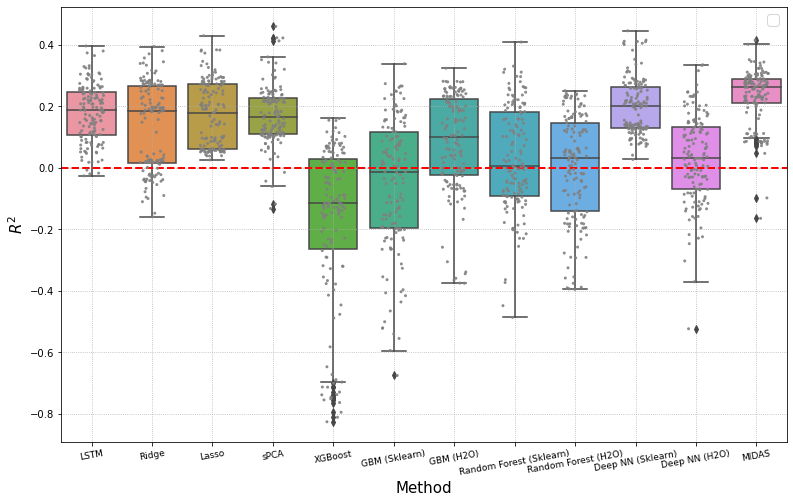

In [1]:
# ======================================== Plot out-of-sample statistics for small FRED-QD plus the ADS index ================================================ #
# ========================================================================================================================================== #
import pandas as pd
import numpy as np
import os
import sys
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

##### Set the current working directory
path="e:\\Copy\\SCRIPTS\\Forecast_Covid_Recovery\\Data\\FRED\\Revision_1\\"
os.chdir(path)

##### parse dates and times
def date_parser(date): 
    dt = datetime.datetime.strptime(date, '%m/%d/%Y')
    return dt.strftime('%Y-%m-%d') 

def plot_OoS_stats(fhorizon=1):
    ##### Import data
    lstm_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_LSTMf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ridge_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_ridge_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    lasso_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_lasso_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    pca_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_multivar_lhOLSPC_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    xgboost_h2o_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_xgboost_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    gbm_sklearn_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_GBMf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    gbm_h2o_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_gbm_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
                    
    RF_sklearn_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_RFf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    RF_h2o_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_randomforest_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    DL_sklearn_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_ANNf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    DL_h2o_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_deeplearning_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
                        
    prophet_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_prophetf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    MIDAS_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_ADS_df_model_midas_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')


    ##### Plot RMSE
    rmse_df = pd.DataFrame(zip(lstm_df.index, lstm_df.rmse, ridge_df.rmse, lasso_df.rmse, pca_df.rmse, xgboost_h2o_df.rmse, gbm_sklearn_df.rmse, gbm_h2o_df.rmse, \
								RF_sklearn_df.rmse, RF_h2o_df.rmse, DL_sklearn_df.rmse, DL_h2o_df.rmse, prophet_df.rmse, MIDAS_df.rmse), \
                                columns = ['date', 'LSTM', 'Ridge', 'Lasso', 'sPCA', 'XGBoost', 'GBM (Sklearn)', 'GBM (H2O)', 'Random Forest (Sklearn)', \
											'Random Forest (H2O)', 'Deep NN (Sklearn)', 'Deep NN (H2O)', 'Prophet', 'MIDAS']) # there are 13 numerical columns
    rmse_df['date'] = rmse_df.date.astype(str) # convert dates to string objects
    print(rmse_df.head())

    colors = ['b', 'darkorange', 'y', 'c', 'm', 'k', 'crimson', 'limegreen', 'steelblue', 'gold', 'hotpink', 'maroon', 'slateblue']
    markers = ['o', 'v', '^', 'p', '>', '*', 'x', 'h', '+', 'p', "D", "d", 'o'] 
    lines = ["-", "--", "-.", (0, (5, 1) ), "-", "--", (0, (3, 1, 1, 1) ), (0, (5, 1) ), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 10, 1, 10, 1, 10)), "-", "--"]
    linewidths = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
    ax = rmse_df.set_index('date').plot(kind='line', figsize=(10, 8), rot=10, color=colors)

    # set line width and line style
    for i, line in enumerate(ax.get_lines()):
        line.set_linewidth(linewidths[i])
        line.set_linestyle(lines[i])
    #     line.set_marker(markers[i])
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    ax.set_ylabel('RMSE', fontsize=15)

    plt.savefig(f'./US_df_ADS_small/graphs/rmse_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(data=rmse_df)
    ax = sns.stripplot(data=rmse_df, jitter=0.2, dodge=True, color='gray', size=3, alpha=0.9)
    ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.set_ylabel('RMSE', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    fig.savefig(f'./US_df_ADS_small/graphs/rmse_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)


    ##### Plot MAE
    mae_df = pd.DataFrame(zip(lstm_df.index, lstm_df.mae, ridge_df.mae, lasso_df.mae, pca_df.mae, xgboost_h2o_df.mae, gbm_sklearn_df.mae, gbm_h2o_df.mae, \
								RF_sklearn_df.mae, RF_h2o_df.mae, DL_sklearn_df.mae, DL_h2o_df.mae, prophet_df.mae, MIDAS_df.mae), \
                                columns = ['date', 'LSTM', 'Ridge', 'Lasso', 'sPCA', 'XGBoost', 'GBM (Sklearn)', 'GBM (H2O)', 'Random Forest (Sklearn)', \
											'Random Forest (H2O)', 'Deep NN (Sklearn)', 'Deep NN (H2O)', 'Prophet', 'MIDAS']) # there are 13 numerical columns
    mae_df['date'] = mae_df.date.astype(str) # convert dates to string objects
    print(mae_df.head())

    ax = mae_df.set_index('date').plot(kind='line', figsize=(10, 8), rot=10, color=colors)
    # set line width and line style
    for i, line in enumerate(ax.get_lines()):
        line.set_linewidth(linewidths[i])
        line.set_linestyle(lines[i])
    #     line.set_marker(markers[i])
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    ax.set_ylabel('MAE', fontsize=15)

    plt.savefig(f'./US_df_ADS_small/graphs/mae_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(data=mae_df)
    ax = sns.stripplot(data=mae_df, jitter=0.2, dodge=True, color='gray', size=3, alpha=0.9)
    ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.set_ylabel('MAE', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    fig.savefig(f'./US_df_ADS_small/graphs/mae_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    ##### Plot R_sq
    r_sq_df = pd.DataFrame(zip(lstm_df.index, lstm_df.r_sq, ridge_df.r_sq, lasso_df.r_sq, pca_df.r_sq, xgboost_h2o_df.r_sq, gbm_sklearn_df.r_sq, gbm_h2o_df.r_sq, \
								RF_sklearn_df.r_sq, RF_h2o_df.r_sq, DL_sklearn_df.r_sq, DL_h2o_df.r_sq, MIDAS_df.r_sq), \
                                columns = ['date', 'LSTM', 'Ridge', 'Lasso', 'sPCA', 'XGBoost', 'GBM (Sklearn)', 'GBM (H2O)', 'Random Forest (Sklearn)', \
											             'Random Forest (H2O)', 'Deep NN (Sklearn)', 'Deep NN (H2O)', 'MIDAS']) # there are 12 numerical columns
    r_sq_df['date'] = r_sq_df.date.astype(str) # convert dates to string objects
    print(r_sq_df.head())

    ax = r_sq_df.set_index('date').plot(kind='line', figsize=(10, 8), rot=10, color=colors)
    # set line width and line style
    for i, line in enumerate(ax.get_lines()):
        line.set_linewidth(linewidths[i])
        line.set_linestyle(lines[i])
    #     line.set_marker(markers[i])
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    ax.set_ylabel('$R^2$', fontsize=15)

    plt.savefig(f'./US_df_ADS_small/graphs/r_sq_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(data=r_sq_df)
    ax = sns.stripplot(data=r_sq_df, jitter=0.2, dodge=True, color='gray', size=3, alpha=0.9)
    ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
    ax.grid(ls=':')
    ax.legend(fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.set_ylabel('$R^2$', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    fig.savefig(f'./US_df_ADS_small/graphs/r_sq_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)
    print(ax)
    return True

plot_OoS_stats(4)


        date                  sample      rmse  label
0 1984-06-01  224 FRED-QD predictors  0.012814  Ridge
1 1984-09-01  224 FRED-QD predictors  0.012810  Ridge
2 1984-12-01  224 FRED-QD predictors  0.012822  Ridge
3 1985-03-01  224 FRED-QD predictors  0.012709  Ridge
4 1985-06-01  224 FRED-QD predictors  0.012707  Ridge
AxesSubplot(0.125,0.125;0.775x0.755)
        date                  sample       mae  label
0 1984-06-01  224 FRED-QD predictors  0.009644  Ridge
1 1984-09-01  224 FRED-QD predictors  0.009594  Ridge
2 1984-12-01  224 FRED-QD predictors  0.009625  Ridge
3 1985-03-01  224 FRED-QD predictors  0.009431  Ridge
4 1985-06-01  224 FRED-QD predictors  0.009413  Ridge
AxesSubplot(0.125,0.125;0.775x0.755)
        date                  sample      r_sq  label
0 1984-06-01  224 FRED-QD predictors -0.091580  Ridge
1 1984-09-01  224 FRED-QD predictors -0.092534  Ridge
2 1984-12-01  224 FRED-QD predictors -0.130937  Ridge
3 1985-03-01  224 FRED-QD predictors -0.110181  Ridge
4 1985-0

True

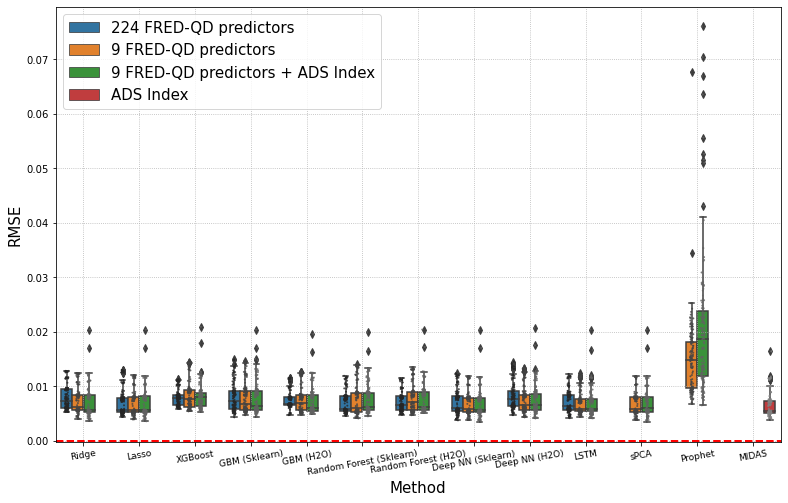

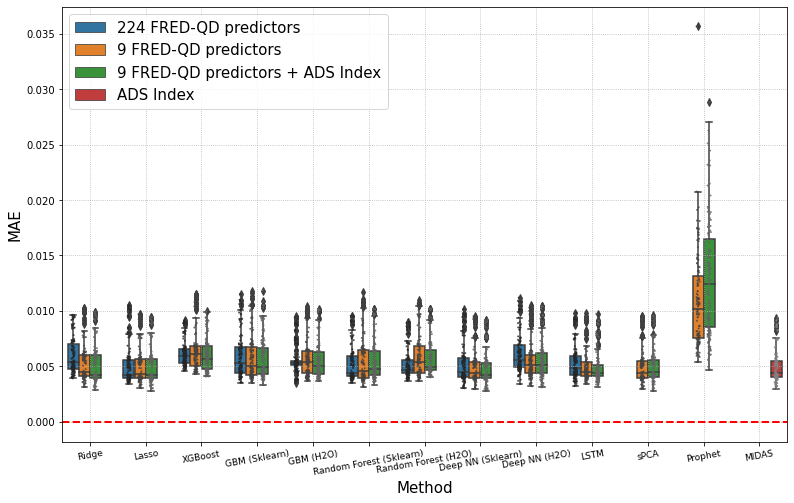

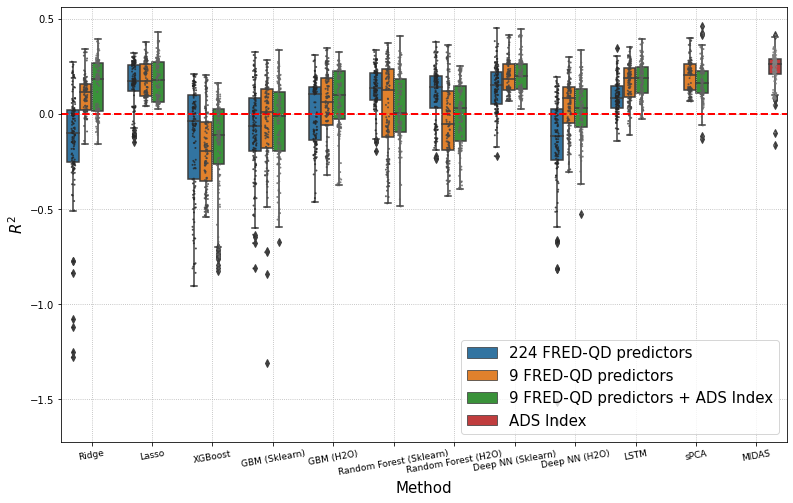

In [10]:
# ============================================== Compare the OoS performance metrics of methods across different samples ====================================== #
# =========================================================================================================================================== #
import pandas as pd
import numpy as np
import os
import sys
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

##### Set the current working directory
path="e:\\Copy\\SCRIPTS\\Forecast_Covid_Recovery\\Data\\FRED\\Revision_1\\"
os.chdir(path)

##### parse dates and times
def date_parser(date): 
    dt = datetime.datetime.strptime(date, '%m/%d/%Y')
    return dt.strftime('%Y-%m-%d') 

def boxplot_by_method(fhorizon =1):
    ##### Import the FRED-QD sample
    big_lstm_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_big1_model_LSTMf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    big_ridge_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_big1_model_ridge_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    big_lasso_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_big1_model_lasso_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    big_pca_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_big1_model_multivar_lhOLSPC_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    big_xgboost_h2o_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_big_model_xgboost_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    big_gbm_sklearn_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/' \
                                                                f'perf_out_US_df_big1_model_GBMf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                                engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    big_gbm_h2o_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big_model_gbm_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
                    
    big_RF_sklearn_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/' \
                                                            f'perf_out_US_df_big1_model_RFf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                            engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    big_RF_h2o_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big_model_randomforest_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    big_DL_sklearn_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/' \
                                                            f'perf_out_US_df_big1_model_ANNf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                            engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    big_DL_h2o_df = pd.read_csv(f'./US_df_big/fhorizon_{fhorizon}/perf_out_US_df_big_model_deeplearning_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ##### Import the small FRED-QD sample
    small_lstm_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_small_model_LSTMf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    small_ridge_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_small_model_ridge_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    small_lasso_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_small_model_lasso_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    small_pca_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_small_model_multivar_lhOLSPC_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    small_xgboost_h2o_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_xgboost_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    small_gbm_sklearn_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/' \
                                                                    f'perf_out_US_df_small_model_GBMf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    small_gbm_h2o_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_gbm_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
                    
    small_RF_sklearn_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/' \
                                                                f'perf_out_US_df_small_model_RFf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                                engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    small_RF_h2o_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_randomforest_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    small_DL_sklearn_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/' \
                                                                f'perf_out_US_df_small_model_ANNf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                                engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    small_DL_h2o_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/perf_out_US_df_small_model_deeplearning_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
                        
    small_prophet_df = pd.read_csv(f'./US_df_small/fhorizon_{fhorizon}/' \
                                                        f'perf_out_US_df_small_model_prophetf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ##### Import the small FRED-QD sample plus ADS
    ADS_lstm_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_ADS_small_model_LSTMf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ADS_ridge_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_ADS_small_model_ridge_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ADS_lasso_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_ADS_small_model_lasso_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ADS_pca_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/' \
                                                    f'perf_out_US_df_ADS_small_model_multivar_lhOLSPC_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ADS_xgboost_h2o_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_xgboost_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ADS_gbm_sklearn_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/' \
                                                                f'perf_out_US_df_ADS_small_model_GBMf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                                engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ADS_gbm_h2o_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_gbm_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                            engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
                    
    ADS_RF_sklearn_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/' \
                                                                f'perf_out_US_df_ADS_small_model_RFf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                                engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ADS_RF_h2o_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_randomforest_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ADS_DL_sklearn_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/' \
                                                                f'perf_out_US_df_ADS_small_model_ANNf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                                engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ADS_DL_h2o_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_df_ADS_small_model_deeplearning_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
                        
    ADS_prophet_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/' \
                                                        f'perf_out_US_df_ADS_small_model_prophetf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

    ADS_MIDAS_df = pd.read_csv(f'./US_df_ADS_small/fhorizon_{fhorizon}/perf_out_US_ADS_df_model_midas_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1.csv', \
                                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')


    ##### Create a big melted dataframe of RMSE to draw a boxplot with nested grouping by predictors
    ridge_df = pd.DataFrame(zip(big_ridge_df.index, big_ridge_df.rmse, small_ridge_df.rmse, ADS_ridge_df.rmse), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    ridge_melted_df = pd.melt(ridge_df, id_vars='date', var_name='sample', value_name = 'rmse')
    ridge_melted_df['label'] = ['Ridge' for i in range(len(ridge_melted_df) )]

    lasso_df = pd.DataFrame(zip(big_lasso_df.index, big_lasso_df.rmse, small_lasso_df.rmse, ADS_lasso_df.rmse), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    lasso_melted_df = pd.melt(lasso_df, id_vars='date', var_name='sample', value_name = 'rmse')
    lasso_melted_df['label'] = ['Lasso' for i in range(len(lasso_melted_df) )]

    xgboost_df = pd.DataFrame(zip(big_xgboost_h2o_df.index, big_xgboost_h2o_df.rmse, small_xgboost_h2o_df.rmse, ADS_xgboost_h2o_df.rmse), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    xgboost_melted_df = pd.melt(xgboost_df, id_vars='date', var_name='sample', value_name = 'rmse')
    xgboost_melted_df['label'] = ['XGBoost' for i in range(len(xgboost_melted_df) )]

    gbm_sklearn_df = pd.DataFrame(zip(big_gbm_sklearn_df.index, big_gbm_sklearn_df.rmse, small_gbm_sklearn_df.rmse, ADS_gbm_sklearn_df.rmse), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    gbm_sklearn_melted_df = pd.melt(gbm_sklearn_df, id_vars='date', var_name='sample', value_name = 'rmse')
    gbm_sklearn_melted_df['label'] = ['GBM (Sklearn)' for i in range(len(gbm_sklearn_melted_df) )]

    gbm_h2o_df = pd.DataFrame(zip(big_gbm_h2o_df.index, big_gbm_h2o_df.rmse, small_gbm_h2o_df.rmse, ADS_gbm_h2o_df.rmse), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    gbm_h2o_melted_df = pd.melt(gbm_h2o_df, id_vars='date', var_name='sample', value_name = 'rmse')
    gbm_h2o_melted_df['label'] = ['GBM (H2O)' for i in range(len(gbm_h2o_melted_df) )]

    RF_sklearn_df = pd.DataFrame(zip(big_RF_sklearn_df.index, big_RF_sklearn_df.rmse, small_RF_sklearn_df.rmse, ADS_RF_sklearn_df.rmse), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    RF_sklearn_melted_df = pd.melt(RF_sklearn_df, id_vars='date', var_name='sample', value_name = 'rmse')
    RF_sklearn_melted_df['label'] = ['Random Forest (Sklearn)' for i in range(len(RF_sklearn_melted_df) )]

    RF_h2o_df = pd.DataFrame(zip(big_RF_h2o_df.index, big_RF_h2o_df.rmse, small_RF_h2o_df.rmse, ADS_RF_h2o_df.rmse), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    RF_h2o_melted_df = pd.melt(RF_h2o_df, id_vars='date', var_name='sample', value_name = 'rmse')
    RF_h2o_melted_df['label'] = ['Random Forest (H2O)' for i in range(len(RF_h2o_melted_df) )]

    DL_sklearn_df = pd.DataFrame(zip(big_DL_sklearn_df.index, big_DL_sklearn_df.rmse, small_DL_sklearn_df.rmse, ADS_DL_sklearn_df.rmse), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    DL_sklearn_melted_df = pd.melt(DL_sklearn_df, id_vars='date', var_name='sample', value_name = 'rmse')
    DL_sklearn_melted_df['label'] = ['Deep NN (Sklearn)' for i in range(len(DL_sklearn_melted_df) )]

    DL_h2o_df = pd.DataFrame(zip(big_DL_h2o_df.index, big_DL_h2o_df.rmse, small_DL_h2o_df.rmse, ADS_DL_h2o_df.rmse), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    DL_h2o_melted_df = pd.melt(DL_h2o_df, id_vars='date', var_name='sample', value_name = 'rmse')
    DL_h2o_melted_df['label'] = ['Deep NN (H2O)' for i in range(len(DL_h2o_melted_df) )]

    LSTM_df = pd.DataFrame(zip(big_lstm_df.index, big_lstm_df.rmse, small_lstm_df.rmse, ADS_lstm_df.rmse), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    LSTM_melted_df = pd.melt(LSTM_df, id_vars='date', var_name='sample', value_name = 'rmse')
    LSTM_melted_df['label'] = ['LSTM' for i in range(len(LSTM_melted_df) )]

    PCA_df = pd.DataFrame(zip(small_pca_df.index, small_pca_df.rmse, ADS_pca_df.rmse), \
                                                columns=['date', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    PCA_melted_df = pd.melt(PCA_df, id_vars='date', var_name='sample', value_name = 'rmse')
    PCA_melted_df['label'] = ['sPCA' for i in range(len(PCA_melted_df) )]

    prophet_df = pd.DataFrame(zip(small_prophet_df.index, small_prophet_df.rmse, ADS_prophet_df.rmse), \
                                                    columns=['date', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    prophet_melted_df = pd.melt(prophet_df, id_vars='date', var_name='sample', value_name = 'rmse')
    prophet_melted_df['label'] = ['Prophet' for i in range(len(prophet_melted_df) )]

    MIDAS_df = pd.DataFrame(zip(ADS_MIDAS_df.index, ADS_MIDAS_df.rmse), columns=['date',  'ADS Index'])
    MIDAS_melted_df = pd.melt(MIDAS_df, id_vars='date', var_name='sample', value_name = 'rmse')
    MIDAS_melted_df['label'] = ['MIDAS' for i in range(len(MIDAS_melted_df) )]
    
    merged_df = pd.concat([ridge_melted_df, lasso_melted_df, xgboost_melted_df, gbm_sklearn_melted_df, gbm_h2o_melted_df, RF_sklearn_melted_df, \
                                            RF_h2o_melted_df, DL_sklearn_melted_df, DL_h2o_melted_df, LSTM_melted_df, PCA_melted_df, prophet_melted_df, MIDAS_melted_df], axis = 0)
    print(merged_df.head() )

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(x = 'label', y = 'rmse', hue='sample', data=merged_df)
    ax = sns.stripplot(x = 'label', y = 'rmse', hue='sample', data=merged_df, jitter=0.12, dodge=True, color='gray', size=2, alpha=0.8)
    handles, labels = ax.get_legend_handles_labels()
    ax.axhline(0, ls = '--', linewidth = 2, color = 'red') 
    ax.grid(ls=':')
    ax.legend(handles[0:4], labels[0:4], fontsize=15)
    ax.set_ylabel('RMSE', fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    print(ax)
    fig.savefig(f'./rmse_boxplot_all_methods_fhorizon_{fhorizon}.pdf', dpi=500)

    ##### Create a big melted dataframe of MAE to draw a boxplot with nested grouping by predictors
    ridge_df = pd.DataFrame(zip(big_ridge_df.index, big_ridge_df.mae, small_ridge_df.mae, ADS_ridge_df.mae), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    ridge_melted_df = pd.melt(ridge_df, id_vars='date', var_name='sample', value_name = 'mae')
    ridge_melted_df['label'] = ['Ridge' for i in range(len(ridge_melted_df) )]

    lasso_df = pd.DataFrame(zip(big_lasso_df.index, big_lasso_df.mae, small_lasso_df.mae, ADS_lasso_df.mae), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    lasso_melted_df = pd.melt(lasso_df, id_vars='date', var_name='sample', value_name = 'mae')
    lasso_melted_df['label'] = ['Lasso' for i in range(len(lasso_melted_df) )]

    xgboost_df = pd.DataFrame(zip(big_xgboost_h2o_df.index, big_xgboost_h2o_df.mae, small_xgboost_h2o_df.mae, ADS_xgboost_h2o_df.mae), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    xgboost_melted_df = pd.melt(xgboost_df, id_vars='date', var_name='sample', value_name = 'mae')
    xgboost_melted_df['label'] = ['XGBoost' for i in range(len(xgboost_melted_df) )]

    gbm_sklearn_df = pd.DataFrame(zip(big_gbm_sklearn_df.index, big_gbm_sklearn_df.mae, small_gbm_sklearn_df.mae, ADS_gbm_sklearn_df.mae), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    gbm_sklearn_melted_df = pd.melt(gbm_sklearn_df, id_vars='date', var_name='sample', value_name = 'mae')
    gbm_sklearn_melted_df['label'] = ['GBM (Sklearn)' for i in range(len(gbm_sklearn_melted_df) )]

    gbm_h2o_df = pd.DataFrame(zip(big_gbm_h2o_df.index, big_gbm_h2o_df.mae, small_gbm_h2o_df.mae, ADS_gbm_h2o_df.mae), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    gbm_h2o_melted_df = pd.melt(gbm_h2o_df, id_vars='date', var_name='sample', value_name = 'mae')
    gbm_h2o_melted_df['label'] = ['GBM (H2O)' for i in range(len(gbm_h2o_melted_df) )]

    RF_sklearn_df = pd.DataFrame(zip(big_RF_sklearn_df.index, big_RF_sklearn_df.mae, small_RF_sklearn_df.mae, ADS_RF_sklearn_df.mae), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    RF_sklearn_melted_df = pd.melt(RF_sklearn_df, id_vars='date', var_name='sample', value_name = 'mae')
    RF_sklearn_melted_df['label'] = ['Random Forest (Sklearn)' for i in range(len(RF_sklearn_melted_df) )]

    RF_h2o_df = pd.DataFrame(zip(big_RF_h2o_df.index, big_RF_h2o_df.mae, small_RF_h2o_df.mae, ADS_RF_h2o_df.mae), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    RF_h2o_melted_df = pd.melt(RF_h2o_df, id_vars='date', var_name='sample', value_name = 'mae')
    RF_h2o_melted_df['label'] = ['Random Forest (H2O)' for i in range(len(RF_h2o_melted_df) )]

    DL_sklearn_df = pd.DataFrame(zip(big_DL_sklearn_df.index, big_DL_sklearn_df.mae, small_DL_sklearn_df.mae, ADS_DL_sklearn_df.mae), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    DL_sklearn_melted_df = pd.melt(DL_sklearn_df, id_vars='date', var_name='sample', value_name = 'mae')
    DL_sklearn_melted_df['label'] = ['Deep NN (Sklearn)' for i in range(len(DL_sklearn_melted_df) )]

    DL_h2o_df = pd.DataFrame(zip(big_DL_h2o_df.index, big_DL_h2o_df.mae, small_DL_h2o_df.mae, ADS_DL_h2o_df.mae), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    DL_h2o_melted_df = pd.melt(DL_h2o_df, id_vars='date', var_name='sample', value_name = 'mae')
    DL_h2o_melted_df['label'] = ['Deep NN (H2O)' for i in range(len(DL_h2o_melted_df) )]

    LSTM_df = pd.DataFrame(zip(big_lstm_df.index, big_lstm_df.mae, small_lstm_df.mae, ADS_lstm_df.mae), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    LSTM_melted_df = pd.melt(LSTM_df, id_vars='date', var_name='sample', value_name = 'mae')
    LSTM_melted_df['label'] = ['LSTM' for i in range(len(LSTM_melted_df) )]

    PCA_df = pd.DataFrame(zip(small_pca_df.index, small_pca_df.mae, ADS_pca_df.mae), \
                                                columns=['date', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    PCA_melted_df = pd.melt(PCA_df, id_vars='date', var_name='sample', value_name = 'mae')
    PCA_melted_df['label'] = ['sPCA' for i in range(len(PCA_melted_df) )]

    prophet_df = pd.DataFrame(zip(small_prophet_df.index, small_prophet_df.mae, ADS_prophet_df.mae), \
                                                columns=['date', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    prophet_melted_df = pd.melt(prophet_df, id_vars='date', var_name='sample', value_name = 'mae')
    prophet_melted_df['label'] = ['Prophet' for i in range(len(prophet_melted_df) )]

    MIDAS_df = pd.DataFrame(zip(ADS_MIDAS_df.index, ADS_MIDAS_df.mae), columns=['date',  'ADS Index'])
    MIDAS_melted_df = pd.melt(MIDAS_df, id_vars='date', var_name='sample', value_name = 'mae')
    MIDAS_melted_df['label'] = ['MIDAS' for i in range(len(MIDAS_melted_df) )]
    
    merged_df = pd.concat([ridge_melted_df, lasso_melted_df, xgboost_melted_df, gbm_sklearn_melted_df, gbm_h2o_melted_df, RF_sklearn_melted_df, \
                                            RF_h2o_melted_df, DL_sklearn_melted_df, DL_h2o_melted_df, LSTM_melted_df, PCA_melted_df, prophet_melted_df, MIDAS_melted_df], axis = 0)
    print(merged_df.head() )

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(x = 'label', y = 'mae', hue='sample', data=merged_df)
    ax = sns.stripplot(x = 'label', y = 'mae', hue='sample', data=merged_df, jitter=0.12, dodge=True, color='gray', size=2, alpha=0.8)
    handles, labels = ax.get_legend_handles_labels()
    ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
    ax.grid(ls=':')
    ax.legend(handles[0:4], labels[0:4], fontsize=15)
    ax.set_ylabel('MAE', fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    print(ax)
    fig.savefig(f'./mae_boxplot_all_methods_fhorizon_{fhorizon}.pdf', dpi=500)

    ##### Create a big melted dataframe of R^2 to draw a boxplot with nested grouping by predictors
    ridge_df = pd.DataFrame(zip(big_ridge_df.index, big_ridge_df.r_sq, small_ridge_df.r_sq, ADS_ridge_df.r_sq), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    ridge_melted_df = pd.melt(ridge_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    ridge_melted_df['label'] = ['Ridge' for i in range(len(ridge_melted_df) )]

    lasso_df = pd.DataFrame(zip(big_lasso_df.index, big_lasso_df.r_sq, small_lasso_df.r_sq, ADS_lasso_df.r_sq), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    lasso_melted_df = pd.melt(lasso_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    lasso_melted_df['label'] = ['Lasso' for i in range(len(lasso_melted_df) )]

    xgboost_df = pd.DataFrame(zip(big_xgboost_h2o_df.index, big_xgboost_h2o_df.r_sq, small_xgboost_h2o_df.r_sq, ADS_xgboost_h2o_df.r_sq), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    xgboost_melted_df = pd.melt(xgboost_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    xgboost_melted_df['label'] = ['XGBoost' for i in range(len(xgboost_melted_df) )]

    gbm_sklearn_df = pd.DataFrame(zip(big_gbm_sklearn_df.index, big_gbm_sklearn_df.r_sq, small_gbm_sklearn_df.r_sq, ADS_gbm_sklearn_df.r_sq), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    gbm_sklearn_melted_df = pd.melt(gbm_sklearn_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    gbm_sklearn_melted_df['label'] = ['GBM (Sklearn)' for i in range(len(gbm_sklearn_melted_df) )]

    gbm_h2o_df = pd.DataFrame(zip(big_gbm_h2o_df.index, big_gbm_h2o_df.r_sq, small_gbm_h2o_df.r_sq, ADS_gbm_h2o_df.r_sq), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    gbm_h2o_melted_df = pd.melt(gbm_h2o_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    gbm_h2o_melted_df['label'] = ['GBM (H2O)' for i in range(len(gbm_h2o_melted_df) )]

    RF_sklearn_df = pd.DataFrame(zip(big_RF_sklearn_df.index, big_RF_sklearn_df.r_sq, small_RF_sklearn_df.r_sq, ADS_RF_sklearn_df.r_sq), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    RF_sklearn_melted_df = pd.melt(RF_sklearn_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    RF_sklearn_melted_df['label'] = ['Random Forest (Sklearn)' for i in range(len(RF_sklearn_melted_df) )]

    RF_h2o_df = pd.DataFrame(zip(big_RF_h2o_df.index, big_RF_h2o_df.r_sq, small_RF_h2o_df.r_sq, ADS_RF_h2o_df.r_sq), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    RF_h2o_melted_df = pd.melt(RF_h2o_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    RF_h2o_melted_df['label'] = ['Random Forest (H2O)' for i in range(len(RF_h2o_melted_df) )]

    DL_sklearn_df = pd.DataFrame(zip(big_DL_sklearn_df.index, big_DL_sklearn_df.r_sq, small_DL_sklearn_df.r_sq, ADS_DL_sklearn_df.r_sq), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    DL_sklearn_melted_df = pd.melt(DL_sklearn_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    DL_sklearn_melted_df['label'] = ['Deep NN (Sklearn)' for i in range(len(DL_sklearn_melted_df) )]

    DL_h2o_df = pd.DataFrame(zip(big_DL_h2o_df.index, big_DL_h2o_df.r_sq, small_DL_h2o_df.r_sq, ADS_DL_h2o_df.r_sq), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    DL_h2o_melted_df = pd.melt(DL_h2o_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    DL_h2o_melted_df['label'] = ['Deep NN (H2O)' for i in range(len(DL_h2o_melted_df) )]

    LSTM_df = pd.DataFrame(zip(big_lstm_df.index, big_lstm_df.r_sq, small_lstm_df.r_sq, ADS_lstm_df.r_sq), \
                                                columns=['date', '224 FRED-QD predictors', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    LSTM_melted_df = pd.melt(LSTM_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    LSTM_melted_df['label'] = ['LSTM' for i in range(len(LSTM_melted_df) )]

    PCA_df = pd.DataFrame(zip(small_pca_df.index, small_pca_df.r_sq, ADS_pca_df.r_sq), \
                                                columns=['date', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    PCA_melted_df = pd.melt(PCA_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    PCA_melted_df['label'] = ['sPCA' for i in range(len(PCA_melted_df) )]

    prophet_df = pd.DataFrame(zip(small_prophet_df.index, small_prophet_df.r_sq, ADS_prophet_df.r_sq), \
                                                columns=['date', '9 FRED-QD predictors', '9 FRED-QD predictors + ADS Index'])
    prophet_melted_df = pd.melt(prophet_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    prophet_melted_df['label'] = ['Prophet' for i in range(len(prophet_melted_df) )]

    MIDAS_df = pd.DataFrame(zip(ADS_MIDAS_df.index, ADS_MIDAS_df.r_sq), columns=['date',  'ADS Index'])
    MIDAS_melted_df = pd.melt(MIDAS_df, id_vars='date', var_name='sample', value_name = 'r_sq')
    MIDAS_melted_df['label'] = ['MIDAS' for i in range(len(MIDAS_melted_df) )]
    
    merged_df = pd.concat([ridge_melted_df, lasso_melted_df, xgboost_melted_df, gbm_sklearn_melted_df, gbm_h2o_melted_df, RF_sklearn_melted_df, \
                                            RF_h2o_melted_df, DL_sklearn_melted_df, DL_h2o_melted_df, LSTM_melted_df, PCA_melted_df, MIDAS_melted_df], axis = 0)
    print(merged_df.head() )

    fig, ax = plt.subplots( figsize=(13, 8) )
    ax = sns.boxplot(x = 'label', y = 'r_sq', hue='sample', data=merged_df)
    ax = sns.stripplot(x = 'label', y = 'r_sq', hue='sample', data=merged_df, jitter=0.12, dodge=True, color='gray', size=2, alpha=0.8)
    handles, labels = ax.get_legend_handles_labels()
    ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
    ax.grid(ls=':')
    ax.legend(handles[0:4], labels[0:4], fontsize=15)
    ax.set_ylabel('$R^2$', fontsize=15)
    ax.set_xlabel('Method', fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
    print(ax)
    fig.savefig(f'./r_sq_boxplot_all_methods_fhorizon_{fhorizon}.pdf', dpi=500)
    return True

boxplot_by_method(4)

,sstart,ssample_start_date,mad,mae,rmse,r_sq,rmse_in,mae_in
ssample_end_date,,,,,,,,
1984-03-01,0,6/1/1959,0.008176,0.009403,0.011722,0.077625,0.034027,0.032048
1984-06-01,1,9/1/1959,0.008179,0.009522,0.011833,0.069101,0.061212,0.056993
1984-09-01,2,12/1/1959,0.008150,0.009491,0.011812,0.071041,0.031454,0.027526
1984-12-01,3,3/1/1960,0.006986,0.009124,0.011576,0.078266,0.059105,0.055435
1985-03-01,4,6/1/1960,0.008456,0.009158,0.011616,0.072501,0.059360,0.055400


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.034027,Deep NN (Sklearn)
1,1984-06-01,In-Sample RMSE,0.061212,Deep NN (Sklearn)
2,1984-09-01,In-Sample RMSE,0.031454,Deep NN (Sklearn)
3,1984-12-01,In-Sample RMSE,0.059105,Deep NN (Sklearn)
4,1985-03-01,In-Sample RMSE,0.059360,Deep NN (Sklearn)


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.0106,Deep NN (H2O)
1,1984-06-01,In-Sample RMSE,0.0105,Deep NN (H2O)
2,1984-09-01,In-Sample RMSE,0.0107,Deep NN (H2O)
3,1984-12-01,In-Sample RMSE,0.0106,Deep NN (H2O)
4,1985-03-01,In-Sample RMSE,0.0107,Deep NN (H2O)


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.012125,GBM (Sklearn)
1,1984-06-01,In-Sample RMSE,0.012046,GBM (Sklearn)
2,1984-09-01,In-Sample RMSE,0.012032,GBM (Sklearn)
3,1984-12-01,In-Sample RMSE,0.012100,GBM (Sklearn)
4,1985-03-01,In-Sample RMSE,0.012141,GBM (Sklearn)


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.0120,GBM (H2O)
1,1984-06-01,In-Sample RMSE,0.0121,GBM (H2O)
2,1984-09-01,In-Sample RMSE,0.0121,GBM (H2O)
3,1984-12-01,In-Sample RMSE,0.0124,GBM (H2O)
4,1985-03-01,In-Sample RMSE,0.0124,GBM (H2O)


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.011950,Lasso
1,1984-06-01,In-Sample RMSE,0.011932,Lasso
2,1984-09-01,In-Sample RMSE,0.011932,Lasso
3,1984-12-01,In-Sample RMSE,0.011932,Lasso
4,1985-03-01,In-Sample RMSE,0.011932,Lasso


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.015759,LSTM
1,1984-06-01,In-Sample RMSE,0.016033,LSTM
2,1984-09-01,In-Sample RMSE,0.015979,LSTM
3,1984-12-01,In-Sample RMSE,0.015712,LSTM
4,1985-03-01,In-Sample RMSE,0.016327,LSTM


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.009193,sPCA
1,1984-06-01,In-Sample RMSE,0.009285,sPCA
2,1984-09-01,In-Sample RMSE,0.009289,sPCA
3,1984-12-01,In-Sample RMSE,0.009339,sPCA
4,1985-03-01,In-Sample RMSE,0.009440,sPCA


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.011974,Random Forest (Sklearn)
1,1984-06-01,In-Sample RMSE,0.011965,Random Forest (Sklearn)
2,1984-09-01,In-Sample RMSE,0.012031,Random Forest (Sklearn)
3,1984-12-01,In-Sample RMSE,0.012205,Random Forest (Sklearn)
4,1985-03-01,In-Sample RMSE,0.012076,Random Forest (Sklearn)


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.0123,Random Forest (H2O)
1,1984-06-01,In-Sample RMSE,0.0124,Random Forest (H2O)
2,1984-09-01,In-Sample RMSE,0.0124,Random Forest (H2O)
3,1984-12-01,In-Sample RMSE,0.0124,Random Forest (H2O)
4,1985-03-01,In-Sample RMSE,0.0125,Random Forest (H2O)


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.014914,Prophet
1,1984-06-01,In-Sample RMSE,0.016306,Prophet
2,1984-09-01,In-Sample RMSE,0.015705,Prophet
3,1984-12-01,In-Sample RMSE,0.015785,Prophet
4,1985-03-01,In-Sample RMSE,0.015550,Prophet


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.012371,Ridge
1,1984-06-01,In-Sample RMSE,0.012468,Ridge
2,1984-09-01,In-Sample RMSE,0.012506,Ridge
3,1984-12-01,In-Sample RMSE,0.012506,Ridge
4,1985-03-01,In-Sample RMSE,0.012537,Ridge


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.0125,XGBoost
1,1984-06-01,In-Sample RMSE,0.0125,XGBoost
2,1984-09-01,In-Sample RMSE,0.0125,XGBoost
3,1984-12-01,In-Sample RMSE,0.0125,XGBoost
4,1985-03-01,In-Sample RMSE,0.0125,XGBoost


,date,performance,rmse,label
0,1984-03-01,In-Sample RMSE,0.034027,Deep NN (Sklearn)
1,1984-06-01,In-Sample RMSE,0.061212,Deep NN (Sklearn)
2,1984-09-01,In-Sample RMSE,0.031454,Deep NN (Sklearn)
3,1984-12-01,In-Sample RMSE,0.059105,Deep NN (Sklearn)
4,1985-03-01,In-Sample RMSE,0.059360,Deep NN (Sklearn)


AxesSubplot(0.125,0.125;0.775x0.755)


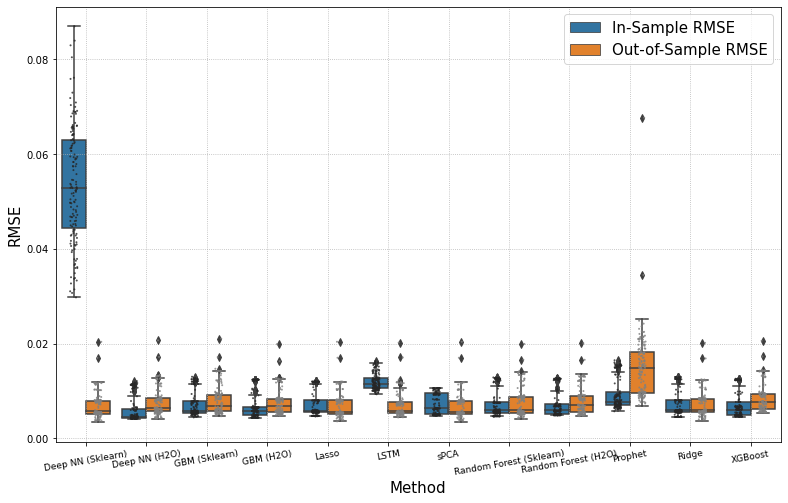

In [28]:
# ============================ Plot the median in-sample RMSE values versus the OoS RMSE values of the methods for the small FRED-QD =============================== #
# ========================================================================================================================================== #
import pandas as pd
import numpy as np
import os
import sys
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

##### Set the current working directory
path="e:\\Copy\\SCRIPTS\\Forecast_Covid_Recovery\\Data\\FRED\\Revision_1\\"
os.chdir(path)

##### parse dates and times
def date_parser(date): 
    dt = datetime.datetime.strptime(date, '%m/%d/%Y')
    return dt.strftime('%Y-%m-%d') 

dataset_name = 'US_df_small' # set the name of the dataset being used
fhorizon = 4 # set the forecast horizon

##### Import performance metrics into dataframes
ANN_sklearn_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_ANNf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
display(ANN_sklearn_df.head() )

ANN_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_deeplearning_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

GBM_sklearn_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_GBMf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

GBM_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_gbm_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

LASSO_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_lasso_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

LSTM_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_LSTMf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

PCA_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                    f'perf_out_{dataset_name}_model_multivar_lhOLSPC_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

Prophet_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                            f'perf_out_{dataset_name}_model_prophetf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                            engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

RF_sklearn_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                    f'perf_out_{dataset_name}_model_RFf_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

RF_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                    f'perf_out_{dataset_name}_model_randomforest_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

Ridge_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_ridge_sampsize_246_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

XGBoost_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                            f'perf_out_{dataset_name}_model_xgboost_ssize_246_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                            engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')


# extract in-sample and OoS RMSE values and melt them to make a new dataframe
ANN_sklearn_rmse_df = pd.DataFrame(zip(ANN_sklearn_df.index, ANN_sklearn_df.rmse_in, ANN_sklearn_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
ANN_sklearn_rmse_melted_df = pd.melt(ANN_sklearn_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
ANN_sklearn_rmse_melted_df['label'] = ['Deep NN (Sklearn)' for i in range(len(ANN_sklearn_rmse_melted_df) )]
display(ANN_sklearn_rmse_melted_df.head() )

ANN_h2o_rmse_df = pd.DataFrame(zip(ANN_h2o_df.index, ANN_h2o_df.rmse_in_med, ANN_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
ANN_h2o_rmse_melted_df = pd.melt(ANN_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
ANN_h2o_rmse_melted_df['label'] = ['Deep NN (H2O)' for i in range(len(ANN_h2o_rmse_melted_df) )]
display(ANN_h2o_rmse_melted_df.head() )

GBM_sklearn_rmse_df = pd.DataFrame(zip(GBM_sklearn_df.index, GBM_sklearn_df.rmse_in, GBM_sklearn_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
GBM_sklearn_rmse_melted_df = pd.melt(GBM_sklearn_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
GBM_sklearn_rmse_melted_df['label'] = ['GBM (Sklearn)' for i in range(len(GBM_sklearn_rmse_melted_df) )]
display(GBM_sklearn_rmse_melted_df.head() )

GBM_h2o_rmse_df = pd.DataFrame(zip(GBM_h2o_df.index, GBM_h2o_df.rmse_in_med, GBM_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
GBM_h2o_rmse_melted_df = pd.melt(GBM_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
GBM_h2o_rmse_melted_df['label'] = ['GBM (H2O)' for i in range(len(GBM_h2o_rmse_melted_df) )]
display(GBM_h2o_rmse_melted_df.head() )

LASSO_rmse_df = pd.DataFrame(zip(LASSO_df.index, LASSO_df.rmse_in, LASSO_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
LASSO_rmse_melted_df = pd.melt(LASSO_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
LASSO_rmse_melted_df['label'] = ['Lasso' for i in range(len(LASSO_rmse_melted_df) )]
display(LASSO_rmse_melted_df.head() )

LSTM_rmse_df = pd.DataFrame(zip(LSTM_df.index, LSTM_df.rmse_in, LSTM_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
LSTM_rmse_melted_df = pd.melt(LSTM_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
LSTM_rmse_melted_df['label'] = ['LSTM' for i in range(len(LSTM_rmse_melted_df) )]
display(LSTM_rmse_melted_df.head() )

PCA_rmse_df = pd.DataFrame(zip(PCA_df.index, PCA_df.rmse_in, PCA_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
PCA_rmse_melted_df = pd.melt(PCA_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
PCA_rmse_melted_df['label'] = ['sPCA' for i in range(len(PCA_rmse_melted_df) )]
display(PCA_rmse_melted_df.head() )

RF_sklearn_rmse_df = pd.DataFrame(zip(RF_sklearn_df.index, RF_sklearn_df.rmse_in, RF_sklearn_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
RF_sklearn_rmse_melted_df = pd.melt(RF_sklearn_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
RF_sklearn_rmse_melted_df['label'] = ['Random Forest (Sklearn)' for i in range(len(RF_sklearn_rmse_melted_df) )]
display(RF_sklearn_rmse_melted_df.head() )

RF_h2o_rmse_df = pd.DataFrame(zip(RF_h2o_df.index, RF_h2o_df.rmse_in_med, RF_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
RF_h2o_rmse_melted_df = pd.melt(RF_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
RF_h2o_rmse_melted_df['label'] = ['Random Forest (H2O)' for i in range(len(RF_h2o_rmse_melted_df) )]
display(RF_h2o_rmse_melted_df.head() )

Prophet_rmse_df = pd.DataFrame(zip(Prophet_df.index, Prophet_df.rmse_in, Prophet_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
Prophet_rmse_melted_df = pd.melt(Prophet_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
Prophet_rmse_melted_df['label'] = ['Prophet' for i in range(len(Prophet_rmse_melted_df) )]
display(Prophet_rmse_melted_df.head() )

Ridge_rmse_df = pd.DataFrame(zip(Ridge_df.index, Ridge_df.rmse_in, Ridge_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
Ridge_rmse_melted_df = pd.melt(Ridge_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
Ridge_rmse_melted_df['label'] = ['Ridge' for i in range(len(Ridge_rmse_melted_df) )]
display(Ridge_rmse_melted_df.head() )

XGBoost_h2o_rmse_df = pd.DataFrame(zip(XGBoost_h2o_df.index, XGBoost_h2o_df.rmse_in_med, XGBoost_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
XGBoost_h2o_rmse_melted_df = pd.melt(XGBoost_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
XGBoost_h2o_rmse_melted_df['label'] = ['XGBoost' for i in range(len(XGBoost_h2o_rmse_melted_df) )]
display(XGBoost_h2o_rmse_melted_df.head() )

merged_df = pd.concat([ANN_sklearn_rmse_melted_df, ANN_h2o_rmse_melted_df, GBM_sklearn_rmse_melted_df, GBM_h2o_rmse_melted_df, LASSO_rmse_melted_df, \
                                        LSTM_rmse_melted_df, PCA_rmse_melted_df, RF_sklearn_rmse_melted_df, RF_h2o_rmse_melted_df, Prophet_rmse_melted_df, Ridge_rmse_melted_df, \
                                        XGBoost_h2o_rmse_melted_df], axis = 0)
display(merged_df.head() )

fig, ax = plt.subplots( figsize=(13, 8) )
ax = sns.boxplot(x = 'label', y = 'rmse', hue='performance', data=merged_df)
ax = sns.stripplot(x = 'label', y = 'rmse', hue='performance', data=merged_df, jitter=0.12, dodge=True, color='gray', size=2, alpha=0.8)
handles, labels = ax.get_legend_handles_labels()
# ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
ax.grid(ls=':')
ax.legend(handles[0:2], labels[0:2], fontsize=15)
ax.set_ylabel('RMSE', fontsize=15)
ax.set_xlabel('Method', fontsize=15)
ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
print(ax)
fig.savefig(f'./{dataset_name}/graphs/is_oos_rmse_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)

,sstart,ssample_start_date,mad,mae,rmse,r_sq,rmse_in,mae_in
ssample_end_date,,,,,,,,
1984-06-01,0,9/1/1959,0.008238,0.009438,0.011940,0.052236,0.199464,0.180419
1984-09-01,1,12/1/1959,0.008829,0.009794,0.012243,0.002026,0.327905,0.320084
1984-12-01,2,3/1/1960,0.007523,0.009516,0.011981,0.012572,0.297088,0.285889
1985-03-01,3,6/1/1960,0.008061,0.009606,0.012035,0.004397,0.366546,0.353343
1985-06-01,4,9/1/1960,0.007914,0.009090,0.011807,0.039903,0.210950,0.196223


,date,performance,rmse,label
0,1984-06-01,In-Sample RMSE,0.199464,Deep NN (Sklearn)
1,1984-09-01,In-Sample RMSE,0.327905,Deep NN (Sklearn)
2,1984-12-01,In-Sample RMSE,0.297088,Deep NN (Sklearn)
3,1985-03-01,In-Sample RMSE,0.366546,Deep NN (Sklearn)
4,1985-06-01,In-Sample RMSE,0.210950,Deep NN (Sklearn)


,date,performance,rmse,label
0,1984-06-01,In-Sample RMSE,0.0107,Deep NN (H2O)
1,1984-09-01,In-Sample RMSE,0.0105,Deep NN (H2O)
2,1984-12-01,In-Sample RMSE,0.0106,Deep NN (H2O)
3,1985-03-01,In-Sample RMSE,0.0109,Deep NN (H2O)
4,1985-06-01,In-Sample RMSE,0.0105,Deep NN (H2O)


,date,performance,rmse,label
0,1984-06-01,In-Sample RMSE,0.012145,GBM (Sklearn)
1,1984-09-01,In-Sample RMSE,0.012200,GBM (Sklearn)
2,1984-12-01,In-Sample RMSE,0.011843,GBM (Sklearn)
3,1985-03-01,In-Sample RMSE,0.012219,GBM (Sklearn)
4,1985-06-01,In-Sample RMSE,0.012244,GBM (Sklearn)


,date,performance,rmse,label
0,1984-06-01,In-Sample RMSE,0.0111,GBM (H2O)
1,1984-09-01,In-Sample RMSE,0.0114,GBM (H2O)
2,1984-12-01,In-Sample RMSE,0.0114,GBM (H2O)
3,1985-03-01,In-Sample RMSE,0.0114,GBM (H2O)
4,1985-06-01,In-Sample RMSE,0.0115,GBM (H2O)


,date,performance,rmse,label
0,1984-06-01,In-Sample RMSE,0.012053,Lasso
1,1984-09-01,In-Sample RMSE,0.012055,Lasso
2,1984-12-01,In-Sample RMSE,0.012055,Lasso
3,1985-03-01,In-Sample RMSE,0.012222,Lasso
4,1985-06-01,In-Sample RMSE,0.012269,Lasso


,date,performance,rmse,label
0,1984-06-01,In-Sample RMSE,0.022586,LSTM
1,1984-09-01,In-Sample RMSE,0.021667,LSTM
2,1984-12-01,In-Sample RMSE,0.022292,LSTM
3,1985-03-01,In-Sample RMSE,0.021273,LSTM
4,1985-06-01,In-Sample RMSE,0.021282,LSTM


,date,performance,rmse,label
0,1984-06-01,In-Sample RMSE,0.010830,Random Forest (Sklearn)
1,1984-09-01,In-Sample RMSE,0.010940,Random Forest (Sklearn)
2,1984-12-01,In-Sample RMSE,0.011048,Random Forest (Sklearn)
3,1985-03-01,In-Sample RMSE,0.011024,Random Forest (Sklearn)
4,1985-06-01,In-Sample RMSE,0.011041,Random Forest (Sklearn)


,date,performance,rmse,label
0,1984-06-01,In-Sample RMSE,0.0115,Random Forest (H2O)
1,1984-09-01,In-Sample RMSE,0.0116,Random Forest (H2O)
2,1984-12-01,In-Sample RMSE,0.0116,Random Forest (H2O)
3,1985-03-01,In-Sample RMSE,0.0117,Random Forest (H2O)
4,1985-06-01,In-Sample RMSE,0.0118,Random Forest (H2O)


,date,performance,rmse,label
0,1984-06-01,In-Sample RMSE,0.011390,Ridge
1,1984-09-01,In-Sample RMSE,0.011405,Ridge
2,1984-12-01,In-Sample RMSE,0.011607,Ridge
3,1985-03-01,In-Sample RMSE,0.011622,Ridge
4,1985-06-01,In-Sample RMSE,0.011622,Ridge


,date,performance,rmse,label
0,1984-06-01,In-Sample RMSE,0.0120,XGBoost
1,1984-09-01,In-Sample RMSE,0.0122,XGBoost
2,1984-12-01,In-Sample RMSE,0.0122,XGBoost
3,1985-03-01,In-Sample RMSE,0.0123,XGBoost
4,1985-06-01,In-Sample RMSE,0.0124,XGBoost


,date,performance,rmse,label
0,1984-06-01,In-Sample RMSE,0.0107,Deep NN (H2O)
1,1984-09-01,In-Sample RMSE,0.0105,Deep NN (H2O)
2,1984-12-01,In-Sample RMSE,0.0106,Deep NN (H2O)
3,1985-03-01,In-Sample RMSE,0.0109,Deep NN (H2O)
4,1985-06-01,In-Sample RMSE,0.0105,Deep NN (H2O)


AxesSubplot(0.125,0.125;0.775x0.755)


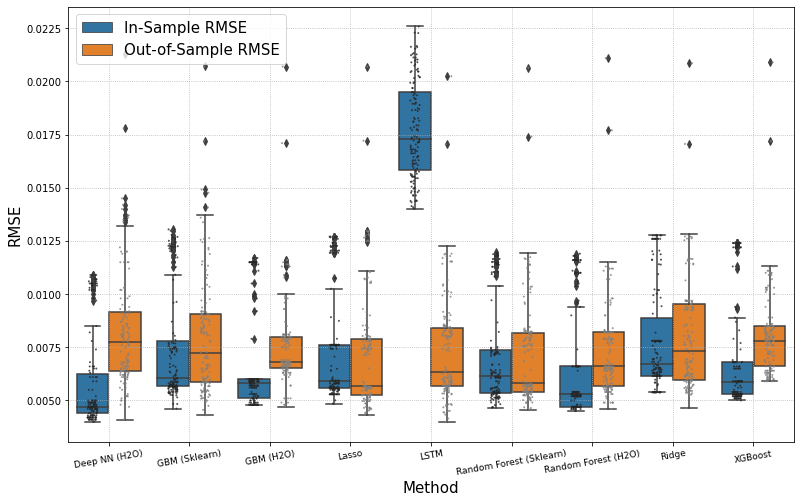

In [32]:
# ============================ Plot the median in-sample RMSE values versus the OoS RMSE values of the methods for the big FRED-QD ================================ #
# ========================================================================================================================================= #
import pandas as pd
import numpy as np
import os
import sys
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

##### Set the current working directory
path="e:\\Copy\\SCRIPTS\\Forecast_Covid_Recovery\\Data\\FRED\\Revision_1\\"
os.chdir(path)

##### parse dates and times
def date_parser(date): 
    dt = datetime.datetime.strptime(date, '%m/%d/%Y')
    return dt.strftime('%Y-%m-%d') 

dataset_name = 'US_df_big' # set the name of the dataset being used
fhorizon = 4 # set the forecast horizon

##### Import performance metrics into dataframes
ANN_sklearn_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}1_model_ANNf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
display(ANN_sklearn_df.head() )

ANN_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_deeplearning_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

GBM_sklearn_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}1_model_GBMf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

GBM_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_gbm_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

LASSO_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}1_model_lasso_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

LSTM_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}1_model_LSTMf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

RF_sklearn_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                    f'perf_out_{dataset_name}1_model_RFf_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

RF_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                    f'perf_out_{dataset_name}_model_randomforest_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

Ridge_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}1_model_ridge_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

XGBoost_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                            f'perf_out_{dataset_name}_model_xgboost_ssize_245_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                            engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')


# extract in-sample and OoS RMSE values and melt them to make a new dataframe
ANN_sklearn_rmse_df = pd.DataFrame(zip(ANN_sklearn_df.index, ANN_sklearn_df.rmse_in, ANN_sklearn_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
ANN_sklearn_rmse_melted_df = pd.melt(ANN_sklearn_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
ANN_sklearn_rmse_melted_df['label'] = ['Deep NN (Sklearn)' for i in range(len(ANN_sklearn_rmse_melted_df) )]
display(ANN_sklearn_rmse_melted_df.head() )

ANN_h2o_rmse_df = pd.DataFrame(zip(ANN_h2o_df.index, ANN_h2o_df.rmse_in_med, ANN_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
ANN_h2o_rmse_melted_df = pd.melt(ANN_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
ANN_h2o_rmse_melted_df['label'] = ['Deep NN (H2O)' for i in range(len(ANN_h2o_rmse_melted_df) )]
display(ANN_h2o_rmse_melted_df.head() )

GBM_sklearn_rmse_df = pd.DataFrame(zip(GBM_sklearn_df.index, GBM_sklearn_df.rmse_in, GBM_sklearn_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
GBM_sklearn_rmse_melted_df = pd.melt(GBM_sklearn_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
GBM_sklearn_rmse_melted_df['label'] = ['GBM (Sklearn)' for i in range(len(GBM_sklearn_rmse_melted_df) )]
display(GBM_sklearn_rmse_melted_df.head() )

GBM_h2o_rmse_df = pd.DataFrame(zip(GBM_h2o_df.index, GBM_h2o_df.rmse_in_med, GBM_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
GBM_h2o_rmse_melted_df = pd.melt(GBM_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
GBM_h2o_rmse_melted_df['label'] = ['GBM (H2O)' for i in range(len(GBM_h2o_rmse_melted_df) )]
display(GBM_h2o_rmse_melted_df.head() )

LASSO_rmse_df = pd.DataFrame(zip(LASSO_df.index, LASSO_df.rmse_in, LASSO_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
LASSO_rmse_melted_df = pd.melt(LASSO_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
LASSO_rmse_melted_df['label'] = ['Lasso' for i in range(len(LASSO_rmse_melted_df) )]
display(LASSO_rmse_melted_df.head() )

LSTM_rmse_df = pd.DataFrame(zip(LSTM_df.index, LSTM_df.rmse_in, LSTM_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
LSTM_rmse_melted_df = pd.melt(LSTM_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
LSTM_rmse_melted_df['label'] = ['LSTM' for i in range(len(LSTM_rmse_melted_df) )]
display(LSTM_rmse_melted_df.head() )

RF_sklearn_rmse_df = pd.DataFrame(zip(RF_sklearn_df.index, RF_sklearn_df.rmse_in, RF_sklearn_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
RF_sklearn_rmse_melted_df = pd.melt(RF_sklearn_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
RF_sklearn_rmse_melted_df['label'] = ['Random Forest (Sklearn)' for i in range(len(RF_sklearn_rmse_melted_df) )]
display(RF_sklearn_rmse_melted_df.head() )

RF_h2o_rmse_df = pd.DataFrame(zip(RF_h2o_df.index, RF_h2o_df.rmse_in_med, RF_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
RF_h2o_rmse_melted_df = pd.melt(RF_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
RF_h2o_rmse_melted_df['label'] = ['Random Forest (H2O)' for i in range(len(RF_h2o_rmse_melted_df) )]
display(RF_h2o_rmse_melted_df.head() )

Ridge_rmse_df = pd.DataFrame(zip(Ridge_df.index, Ridge_df.rmse_in, Ridge_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
Ridge_rmse_melted_df = pd.melt(Ridge_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
Ridge_rmse_melted_df['label'] = ['Ridge' for i in range(len(Ridge_rmse_melted_df) )]
display(Ridge_rmse_melted_df.head() )

XGBoost_h2o_rmse_df = pd.DataFrame(zip(XGBoost_h2o_df.index, XGBoost_h2o_df.rmse_in_med, XGBoost_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
XGBoost_h2o_rmse_melted_df = pd.melt(XGBoost_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
XGBoost_h2o_rmse_melted_df['label'] = ['XGBoost' for i in range(len(XGBoost_h2o_rmse_melted_df) )]
display(XGBoost_h2o_rmse_melted_df.head() )

merged_df = pd.concat([ANN_h2o_rmse_melted_df, GBM_sklearn_rmse_melted_df, GBM_h2o_rmse_melted_df, LASSO_rmse_melted_df, \
                                        LSTM_rmse_melted_df, RF_sklearn_rmse_melted_df, RF_h2o_rmse_melted_df, Ridge_rmse_melted_df, \
                                        XGBoost_h2o_rmse_melted_df], axis = 0)
display(merged_df.head() )

fig, ax = plt.subplots( figsize=(13, 8) )
ax = sns.boxplot(x = 'label', y = 'rmse', hue='performance', data=merged_df)
ax = sns.stripplot(x = 'label', y = 'rmse', hue='performance', data=merged_df, jitter=0.12, dodge=True, color='gray', size=2, alpha=0.8)
handles, labels = ax.get_legend_handles_labels()
# ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
ax.grid(ls=':')
ax.legend(handles[0:2], labels[0:2], fontsize=15)
ax.set_ylabel('RMSE', fontsize=15)
ax.set_xlabel('Method', fontsize=15)
ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
print(ax)
fig.savefig(f'./{dataset_name}/graphs/is_oos_rmse_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)

,sstart,ssample_start_date,mad,mae,rmse,r_sq,rmse_in,mae_in
ssample_end_date,,,,,,,,
1985-06-01,0,1960-09-01,0.007986,0.008722,0.011232,0.082069,0.073034,0.069507
1985-09-01,1,1960-12-01,0.007681,0.008642,0.011195,0.068525,0.050158,0.044330
1985-12-01,2,1961-03-01,0.008042,0.008689,0.011227,0.062118,0.092033,0.088750
1986-03-01,3,1961-06-01,0.007608,0.008585,0.011250,0.055057,0.034850,0.030841
1986-06-01,4,1961-09-01,0.007958,0.008566,0.011179,0.068355,0.061521,0.056917


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.073034,Deep NN (Sklearn)
1,1985-09-01,In-Sample RMSE,0.050158,Deep NN (Sklearn)
2,1985-12-01,In-Sample RMSE,0.092033,Deep NN (Sklearn)
3,1986-03-01,In-Sample RMSE,0.034850,Deep NN (Sklearn)
4,1986-06-01,In-Sample RMSE,0.061521,Deep NN (Sklearn)


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.0103,Deep NN (H2O)
1,1985-09-01,In-Sample RMSE,0.0102,Deep NN (H2O)
2,1985-12-01,In-Sample RMSE,0.0101,Deep NN (H2O)
3,1986-03-01,In-Sample RMSE,0.0100,Deep NN (H2O)
4,1986-06-01,In-Sample RMSE,0.0099,Deep NN (H2O)


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.011726,GBM (Sklearn)
1,1985-09-01,In-Sample RMSE,0.011709,GBM (Sklearn)
2,1985-12-01,In-Sample RMSE,0.011635,GBM (Sklearn)
3,1986-03-01,In-Sample RMSE,0.011201,GBM (Sklearn)
4,1986-06-01,In-Sample RMSE,0.011624,GBM (Sklearn)


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.0109,GBM (H2O)
1,1985-09-01,In-Sample RMSE,0.0109,GBM (H2O)
2,1985-12-01,In-Sample RMSE,0.0109,GBM (H2O)
3,1986-03-01,In-Sample RMSE,0.0109,GBM (H2O)
4,1986-06-01,In-Sample RMSE,0.0109,GBM (H2O)


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.010577,Lasso
1,1985-09-01,In-Sample RMSE,0.010501,Lasso
2,1985-12-01,In-Sample RMSE,0.010501,Lasso
3,1986-03-01,In-Sample RMSE,0.010501,Lasso
4,1986-06-01,In-Sample RMSE,0.010501,Lasso


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.017699,LSTM
1,1985-09-01,In-Sample RMSE,0.018166,LSTM
2,1985-12-01,In-Sample RMSE,0.017537,LSTM
3,1986-03-01,In-Sample RMSE,0.017365,LSTM
4,1986-06-01,In-Sample RMSE,0.017538,LSTM


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.008423,sPCA
1,1985-09-01,In-Sample RMSE,0.008452,sPCA
2,1985-12-01,In-Sample RMSE,0.008480,sPCA
3,1986-03-01,In-Sample RMSE,0.008539,sPCA
4,1986-06-01,In-Sample RMSE,0.008590,sPCA


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.010333,Random Forest (Sklearn)
1,1985-09-01,In-Sample RMSE,0.010261,Random Forest (Sklearn)
2,1985-12-01,In-Sample RMSE,0.010327,Random Forest (Sklearn)
3,1986-03-01,In-Sample RMSE,0.010433,Random Forest (Sklearn)
4,1986-06-01,In-Sample RMSE,0.010166,Random Forest (Sklearn)


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.0112,Random Forest (H2O)
1,1985-09-01,In-Sample RMSE,0.0112,Random Forest (H2O)
2,1985-12-01,In-Sample RMSE,0.0112,Random Forest (H2O)
3,1986-03-01,In-Sample RMSE,0.0112,Random Forest (H2O)
4,1986-06-01,In-Sample RMSE,0.0111,Random Forest (H2O)


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.013663,Prophet
1,1985-09-01,In-Sample RMSE,0.013815,Prophet
2,1985-12-01,In-Sample RMSE,0.013444,Prophet
3,1986-03-01,In-Sample RMSE,0.013653,Prophet
4,1986-06-01,In-Sample RMSE,0.013770,Prophet


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.010546,Ridge
1,1985-09-01,In-Sample RMSE,0.010546,Ridge
2,1985-12-01,In-Sample RMSE,0.010546,Ridge
3,1986-03-01,In-Sample RMSE,0.010546,Ridge
4,1986-06-01,In-Sample RMSE,0.010546,Ridge


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.0111,XGBoost
1,1985-09-01,In-Sample RMSE,0.0111,XGBoost
2,1985-12-01,In-Sample RMSE,0.0111,XGBoost
3,1986-03-01,In-Sample RMSE,0.0111,XGBoost
4,1986-06-01,In-Sample RMSE,0.0111,XGBoost


,date,performance,rmse,label
0,1984-06-30,In-Sample RMSE,0.011025,MIDAS
1,1984-09-30,In-Sample RMSE,0.011129,MIDAS
2,1984-12-31,In-Sample RMSE,0.011131,MIDAS
3,1985-03-31,In-Sample RMSE,0.011426,MIDAS
4,1985-06-30,In-Sample RMSE,0.011454,MIDAS


,date,performance,rmse,label
0,1985-06-01,In-Sample RMSE,0.0103,Deep NN (H2O)
1,1985-09-01,In-Sample RMSE,0.0102,Deep NN (H2O)
2,1985-12-01,In-Sample RMSE,0.0101,Deep NN (H2O)
3,1986-03-01,In-Sample RMSE,0.0100,Deep NN (H2O)
4,1986-06-01,In-Sample RMSE,0.0099,Deep NN (H2O)


AxesSubplot(0.125,0.125;0.775x0.755)


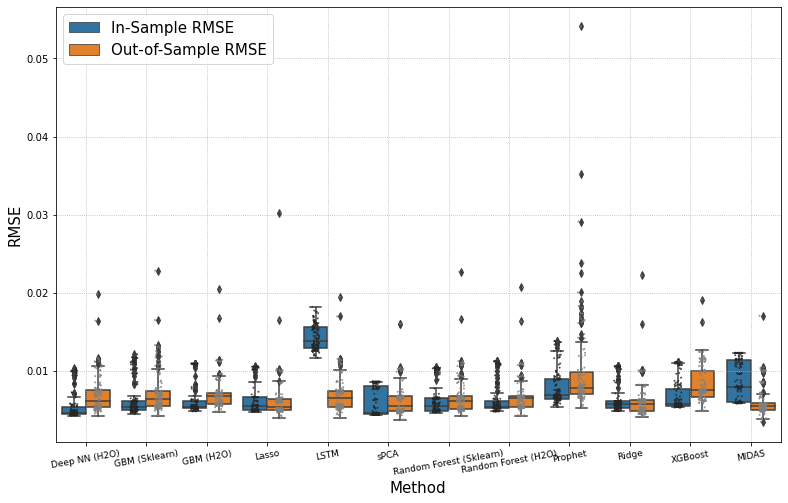

In [9]:
# =================== Plot the median in-sample RMSE values versus the OoS RMSE values of the methods for the small FRED-QD plus the ADS index ======================== #
# ========================================================================================================================================= #
import pandas as pd
import numpy as np
import os
import sys
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

##### Set the current working directory
path="e:\\Copy\\SCRIPTS\\Forecast_Covid_Recovery\\Data\\FRED\\Revision_1\\"
os.chdir(path)

##### parse dates and times
def date_parser(date): 
    dt = datetime.datetime.strptime(date, '%m/%d/%Y')
    return dt.strftime('%Y-%m-%d') 

dataset_name = 'US_df_ADS_small' # set the name of the dataset being used
fhorizon = 1 # set the forecast horizon

##### Import performance metrics into dataframes
ANN_sklearn_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_ANNf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')
display(ANN_sklearn_df.head() )

ANN_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_deeplearning_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

GBM_sklearn_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_GBMf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

GBM_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_gbm_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

LASSO_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_lasso_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

LSTM_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_LSTMf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

PCA_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                    f'perf_out_{dataset_name}_model_multivar_lhOLSPC_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

Prophet_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                            f'perf_out_{dataset_name}_model_prophetf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                            engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

RF_sklearn_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                    f'perf_out_{dataset_name}_model_RFf_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

RF_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                    f'perf_out_{dataset_name}_model_randomforest_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                    engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

Ridge_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                        f'perf_out_{dataset_name}_model_ridge_sampsize_241_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1_num_pcs_7_sklearn.csv', \
                                        engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

XGBoost_h2o_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                            f'perf_out_{dataset_name}_model_xgboost_ssize_241_subsize_100_fhorizon_{fhorizon}_ylag_1_h2o.csv', \
                                            engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')

MIDAS_df = pd.read_csv(f'./{dataset_name}/fhorizon_{fhorizon}/' \
                                            f'perf_out_US_ADS_df_model_midas_sampsize_245_subsize_100_wsize_60_fhorizon_{fhorizon}_ylag_1.csv', \
                                            engine = 'python', encoding='utf-8', skipinitialspace=True, sep = ',', parse_dates = ['ssample_end_date'], index_col = 'ssample_end_date')


# extract in-sample and OoS RMSE values and melt them to make a new dataframe
ANN_sklearn_rmse_df = pd.DataFrame(zip(ANN_sklearn_df.index, ANN_sklearn_df.rmse_in, ANN_sklearn_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
ANN_sklearn_rmse_melted_df = pd.melt(ANN_sklearn_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
ANN_sklearn_rmse_melted_df['label'] = ['Deep NN (Sklearn)' for i in range(len(ANN_sklearn_rmse_melted_df) )]
display(ANN_sklearn_rmse_melted_df.head() )

ANN_h2o_rmse_df = pd.DataFrame(zip(ANN_h2o_df.index, ANN_h2o_df.rmse_in_med, ANN_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
ANN_h2o_rmse_melted_df = pd.melt(ANN_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
ANN_h2o_rmse_melted_df['label'] = ['Deep NN (H2O)' for i in range(len(ANN_h2o_rmse_melted_df) )]
display(ANN_h2o_rmse_melted_df.head() )

GBM_sklearn_rmse_df = pd.DataFrame(zip(GBM_sklearn_df.index, GBM_sklearn_df.rmse_in, GBM_sklearn_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
GBM_sklearn_rmse_melted_df = pd.melt(GBM_sklearn_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
GBM_sklearn_rmse_melted_df['label'] = ['GBM (Sklearn)' for i in range(len(GBM_sklearn_rmse_melted_df) )]
display(GBM_sklearn_rmse_melted_df.head() )

GBM_h2o_rmse_df = pd.DataFrame(zip(GBM_h2o_df.index, GBM_h2o_df.rmse_in_med, GBM_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
GBM_h2o_rmse_melted_df = pd.melt(GBM_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
GBM_h2o_rmse_melted_df['label'] = ['GBM (H2O)' for i in range(len(GBM_h2o_rmse_melted_df) )]
display(GBM_h2o_rmse_melted_df.head() )

LASSO_rmse_df = pd.DataFrame(zip(LASSO_df.index, LASSO_df.rmse_in, LASSO_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
LASSO_rmse_melted_df = pd.melt(LASSO_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
LASSO_rmse_melted_df['label'] = ['Lasso' for i in range(len(LASSO_rmse_melted_df) )]
display(LASSO_rmse_melted_df.head() )

LSTM_rmse_df = pd.DataFrame(zip(LSTM_df.index, LSTM_df.rmse_in, LSTM_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
LSTM_rmse_melted_df = pd.melt(LSTM_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
LSTM_rmse_melted_df['label'] = ['LSTM' for i in range(len(LSTM_rmse_melted_df) )]
display(LSTM_rmse_melted_df.head() )

PCA_rmse_df = pd.DataFrame(zip(PCA_df.index, PCA_df.rmse_in, PCA_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
PCA_rmse_melted_df = pd.melt(PCA_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
PCA_rmse_melted_df['label'] = ['sPCA' for i in range(len(PCA_rmse_melted_df) )]
display(PCA_rmse_melted_df.head() )

RF_sklearn_rmse_df = pd.DataFrame(zip(RF_sklearn_df.index, RF_sklearn_df.rmse_in, RF_sklearn_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
RF_sklearn_rmse_melted_df = pd.melt(RF_sklearn_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
RF_sklearn_rmse_melted_df['label'] = ['Random Forest (Sklearn)' for i in range(len(RF_sklearn_rmse_melted_df) )]
display(RF_sklearn_rmse_melted_df.head() )

RF_h2o_rmse_df = pd.DataFrame(zip(RF_h2o_df.index, RF_h2o_df.rmse_in_med, RF_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
RF_h2o_rmse_melted_df = pd.melt(RF_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
RF_h2o_rmse_melted_df['label'] = ['Random Forest (H2O)' for i in range(len(RF_h2o_rmse_melted_df) )]
display(RF_h2o_rmse_melted_df.head() )

Prophet_rmse_df = pd.DataFrame(zip(Prophet_df.index, Prophet_df.rmse_in, Prophet_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
Prophet_rmse_melted_df = pd.melt(Prophet_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
Prophet_rmse_melted_df['label'] = ['Prophet' for i in range(len(Prophet_rmse_melted_df) )]
display(Prophet_rmse_melted_df.head() )

Ridge_rmse_df = pd.DataFrame(zip(Ridge_df.index, Ridge_df.rmse_in, Ridge_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
Ridge_rmse_melted_df = pd.melt(Ridge_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
Ridge_rmse_melted_df['label'] = ['Ridge' for i in range(len(Ridge_rmse_melted_df) )]
display(Ridge_rmse_melted_df.head() )

XGBoost_h2o_rmse_df = pd.DataFrame(zip(XGBoost_h2o_df.index, XGBoost_h2o_df.rmse_in_med, XGBoost_h2o_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
XGBoost_h2o_rmse_melted_df = pd.melt(XGBoost_h2o_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
XGBoost_h2o_rmse_melted_df['label'] = ['XGBoost' for i in range(len(XGBoost_h2o_rmse_melted_df) )]
display(XGBoost_h2o_rmse_melted_df.head() )

MIDAS_rmse_df = pd.DataFrame(zip(MIDAS_df.index, MIDAS_df.rmse_in, MIDAS_df.rmse), columns=['date', 'In-Sample RMSE', 'Out-of-Sample RMSE'])
MIDAS_rmse_melted_df = pd.melt(MIDAS_rmse_df, id_vars='date', var_name='performance', value_name = 'rmse')
MIDAS_rmse_melted_df['label'] = ['MIDAS' for i in range(len(MIDAS_rmse_melted_df) )]
display(MIDAS_rmse_melted_df.head() )

merged_df = pd.concat([ANN_h2o_rmse_melted_df, GBM_sklearn_rmse_melted_df, GBM_h2o_rmse_melted_df, LASSO_rmse_melted_df, \
                                        LSTM_rmse_melted_df, PCA_rmse_melted_df, RF_sklearn_rmse_melted_df, RF_h2o_rmse_melted_df, Prophet_rmse_melted_df, Ridge_rmse_melted_df, \
                                        XGBoost_h2o_rmse_melted_df, MIDAS_rmse_melted_df], axis = 0)
display(merged_df.head() )

fig, ax = plt.subplots( figsize=(13, 8) )
ax = sns.boxplot(x = 'label', y = 'rmse', hue='performance', data=merged_df)
ax = sns.stripplot(x = 'label', y = 'rmse', hue='performance', data=merged_df, jitter=0.12, dodge=True, color='gray', size=2, alpha=0.8)
handles, labels = ax.get_legend_handles_labels()
# ax.axhline(0, ls = '--', linewidth = 2, color ='red') 
ax.grid(ls=':')
ax.legend(handles[0:2], labels[0:2], fontsize=15)
ax.set_ylabel('RMSE', fontsize=15)
ax.set_xlabel('Method', fontsize=15)
ax.tick_params(axis='x', which='major', labelsize=9, labelrotation=10)
print(ax)
fig.savefig(f'./{dataset_name}/graphs/is_oos_rmse_boxplot_fhorizon_{fhorizon}.pdf', dpi=500)